<div class="alert alert-block alert-info" style="background-color: white; text-align: center;">
  <h1> BUSINESS CASE 1: Hotel Customer Segmentation - </h1>
  <h2> Group E </h2>
    
  <p>  </p>
    
  <p> Business Cases for Data Science </p>
  <p> Masters in Data Science Spealization in Business Analytics - 2023/2024 </p>
    
  <p>  </p>
    
  <p><strong style="font-weight: bold;"> Group Members: </strong></p>
  <p> - Duarte Mendes 20230494 <p>
  <p> - Dzmitry Nisht 20230776 <p>
  <p> - Inês Silva 20201580 <p>
  <p> - José Marcal 20201581 <p>
  <p> - Ricardo Sousa 20201611 <p>
    
</div>

### **Table of Contents**

* [1. Notebook Setup](#1)
* [2. Data Understanding](#2)
    * [2.1. Summary Statistics](#2_1)
    * [2.2. Visualizing Data](#2_2)  
* [3. Data Preprocessing](#3)
* [4. Hotel H KPI's (Key Performance Indicators)](#4)    
* [5. Hotel H's Costumer Base Analysis](#5)
* [6. Modelling](#6)
    * [6.1. Reducing Dimensionality with PCA](#6_1)
    * [6.2. Modelling with Kmeans](#6_2)
* [7. Cluster Interpretation](#7)

<hr>

<a class="anchor" id="1">

# 1. Notebook Setup: Packages and Module Loading

</a>

In [1]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# imports for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# imports for imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression

# imports for clustering (or aid)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_score

In [2]:
# show all columns // from: https://builtin.com/data-science/pandas-show-all-columns
pd.set_option('display.max_columns', None)

In [3]:
# remove warnings // from: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# visualization details
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 30
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

<hr>

<a class="anchor" id="2">

# 2. Data Understanding

</a>

<hr>

<a class="anchor" id="2_1">

## 2.1. Summary Statistics

</a>

In [5]:
# importing dataset
df = pd.read_csv("Case1_HotelCustomerSegmentation.csv", delimiter=";")

# set ID as index
df.set_index("ID", inplace=True)
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  

In [7]:
# summary of categorical columns
df.describe(include="object").T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


In [8]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


- there are values where age is negative up to -10, or age is higher then 100 years
- a lead time of -1 is impossible since a customer cannot arrive before booking (theoretically)

In [9]:
# columns
df.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

#### - duplicated values

In [10]:
# duplicates?
df.duplicated().sum()

111

- the dataframe has 111 repeated lines 

In [11]:
# duplicates of DocID column
df["DocIDHash"].duplicated().sum()

8252

- the column DocID has 8252 repeated rows
- same customers appear more than once (repeated DocID)

In [12]:
# counting each value DocID // from: https://stackoverflow.com/questions/35584085/how-to-count-duplicate-rows-in-pandas-dataframe
doc_dups_count = df.groupby("DocIDHash").size().sort_values(ascending=False)

# selecting the ones that repeat more than 1 time 
duplicates_count = doc_dups_count[doc_dups_count > 1]

duplicates_count

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3032
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0xA592CB85BCFF475BA6D93BB2D3618B771B478EF17AC0EAFC39530BD8825E0ABF       2
0xFD1F9D07F63052BE22CFDF78826333C482A0AF8F0CE69A7A3F639EBF00A4FA99       2
0xBAE47E5B61DC80FF07971491A07C667DB2C8ED69908E674C6CA80958269F8E9A       2
0x5F5697BE9CDD358643F0A0CB2B0B3F095CD99C068E9FB3F41CD09883BF0056F6       2
0xC43E7C3E7FD00679814C3B0B28FED4876224DA3C1C02A4938124D91D7245B6AE       2
Length: 3085, dtype: int64

- one of the DocID appears high amount of times, so we believe this value is used as a base code when the customer does not provide one
- other DocID repeat a bit which needs to be treated

In [13]:
# Group by "DocIDHash" and count unique values of "NameHash" within each group
test = df.groupby("DocIDHash")["NameHash"].nunique()

# Filter the counts to get only those DocIDHash with more than one unique value for "NameHash"
result = test[test > 1].sort_values(ascending=False)
result

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2826
0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134290FEBA80F8236C83DB9      10
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B       9
0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BDB7DBBA7E32620809C799       7
0x7CC568500E7D63F938C532073C8FB438F67E1F1F6AF9C8409D1BE3F9ABA4CE5D       6
                                                                      ... 
0x565B065B3871B3510CBC89B2533C7F7EEF4988F5308C0CC4BE26B7A018EFE310       2
0x5693E163A7019FFF1512827D48C88F68C0013E49CB33622DB35AA935C876BB0F       2
0x57495036CC5629A9206E67BEC07EBE6DFCF8E20F96FEB2D720D72E9B7EC5BBB9       2
0x578BD899D1EE8F8E687A240405139C27DDBECCEA79416A5887C2B908520C3B8E       2
0xFF91D161864F72F305F302EC7838C11B4A1691E02F0F7C5A76F70F6E1BE16B29       2
Name: NameHash, Length: 1090, dtype: int64

- the highly repeated DocID presents multiple names, confirming the use of the same number for multiple customers
- some DocID have more than 1 name, which can be an error, or a family member using the card, or a change in name or preference

#### - missing values

In [14]:
# missing values // from: ChatGPT 3.5 generation

# dictionary with missing information
missing = {"# of Missing": df.isna().sum(), "% of Missing": round((df.isna().sum() / len(df)) * 100,2)}

# transform into a dataframe
missing_df = pd.DataFrame(missing)

missing_df

,# of Missing,% of Missing
Nationality,0,0.00
Age,4172,3.73
DaysSinceCreation,0,0.00
NameHash,0,0.00
DocIDHash,1001,0.90
AverageLeadTime,0,0.00
LodgingRevenue,0,0.00
OtherRevenue,0,0.00
BookingsCanceled,0,0.00
BookingsNoShowed,0,0.00


- There are missing values of Document ID of customer (possibly its not mandatory or it occur some error)
- Around 3% of rows are misisng values in age!

#### - unique values

In [15]:
# function to count the unique values in a category // from: ChatGPT 3.5 generation
def print_unique_counts(df, col):
    
    unique_counts = df[col].value_counts()
    total_count = unique_counts.sum()
    print(f"{col} unique values:\n")
    
    for value, count in unique_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")

In [16]:
# for each category apply the function
for i in ["DistributionChannel","MarketSegment","Nationality"]:
    print_unique_counts(df, i)
    print("\n")

DistributionChannel unique values:

Travel Agent/Operator: 91019 (81.46%)
Direct: 16883 (15.11%)
Corporate: 3135 (2.81%)
GDS Systems: 696 (0.62%)


MarketSegment unique values:

Other: 63680 (56.99%)
Direct: 16363 (14.64%)
Travel Agent/Operator: 16353 (14.64%)
Groups: 11461 (10.26%)
Corporate: 2931 (2.62%)
Complementary: 657 (0.59%)
Aviation: 288 (0.26%)


Nationality unique values:

FRA: 16516 (14.78%)
DEU: 14805 (13.25%)
PRT: 14101 (12.62%)
GBR: 11462 (10.26%)
ESP: 6123 (5.48%)
USA: 5409 (4.84%)
ITA: 4268 (3.82%)
BEL: 4111 (3.68%)
BRA: 4037 (3.61%)
NLD: 3794 (3.40%)
IRL: 2938 (2.63%)
CHE: 2686 (2.40%)
CAN: 2192 (1.96%)
AUT: 1949 (1.74%)
SWE: 1687 (1.51%)
ISR: 1149 (1.03%)
CHN: 1147 (1.03%)
NOR: 1055 (0.94%)
POL: 1035 (0.93%)
AUS: 1022 (0.91%)
FIN: 906 (0.81%)
DNK: 875 (0.78%)
RUS: 792 (0.71%)
ROU: 583 (0.52%)
HUN: 412 (0.37%)
JPN: 349 (0.31%)
LUX: 310 (0.28%)
CZE: 307 (0.27%)
GRC: 293 (0.26%)
IND: 271 (0.24%)
MEX: 249 (0.22%)
KOR: 239 (0.21%)
AGO: 239 (0.21%)
ARG: 211 (0.19%)
MAR: 21

- In distribution channel Corporate and GDS System are not significant enough to be relevant
- 60% of the custoemers fall in to Others Market Segmentation, which overall is not good
- There is a high variability in Nationalities, and 50% of customers resume to 4 countries

#### - Clients which never checked in 

In [17]:
df[df["BookingsCheckedIn"]==0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,1,1,0,0,0
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0


- There are around 33000 customers or perfils that never checked in the hotel. These are very likely future customers

In [18]:
df[(df["BookingsCheckedIn"]==0) & ((df["BookingsNoShowed"]!=0)|(df["BookingsCanceled"]!=0)) ]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47035,USA,38.0,599,0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...,0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...,0,0.0,0.0,2,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0


- Out of all of them, only 1 customer canceled or never showed up

<hr>

<a class="anchor" id="2_2">

## 2.2. Visualizing Data

</a>

In [19]:
# to facilitate visualizations we are limiting to 60% of the data // from: ChatGPT 3.5 generation

# create copy of df
viz_df = df.copy()

# calculate percentage of each category and sort it
nationality_counts = viz_df['Nationality'].value_counts(normalize=True).sort_values(ascending=False)

# calculate cumulative percentage
cumulative_percentage = nationality_counts.cumsum()

# get categories that make up to 60%
significant_categories = cumulative_percentage[cumulative_percentage <= 0.6].index.tolist()

# all others are categorize as 'Other'
viz_df['Nationality'] = viz_df['Nationality'].apply(lambda x: x if x in significant_categories else 'Other')

In [20]:
# organizing data
numer= ["Age","DaysSinceCreation","AverageLeadTime","LodgingRevenue", "OtherRevenue","BookingsCanceled","BookingsNoShowed","BookingsCheckedIn","PersonsNights","RoomNights"]
cats= ["Nationality","DistributionChannel","MarketSegment"]
binar= ["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib",
"SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]


#### - Numerical

Text(0.5, 1, 'Numerical Features Pair Plot')

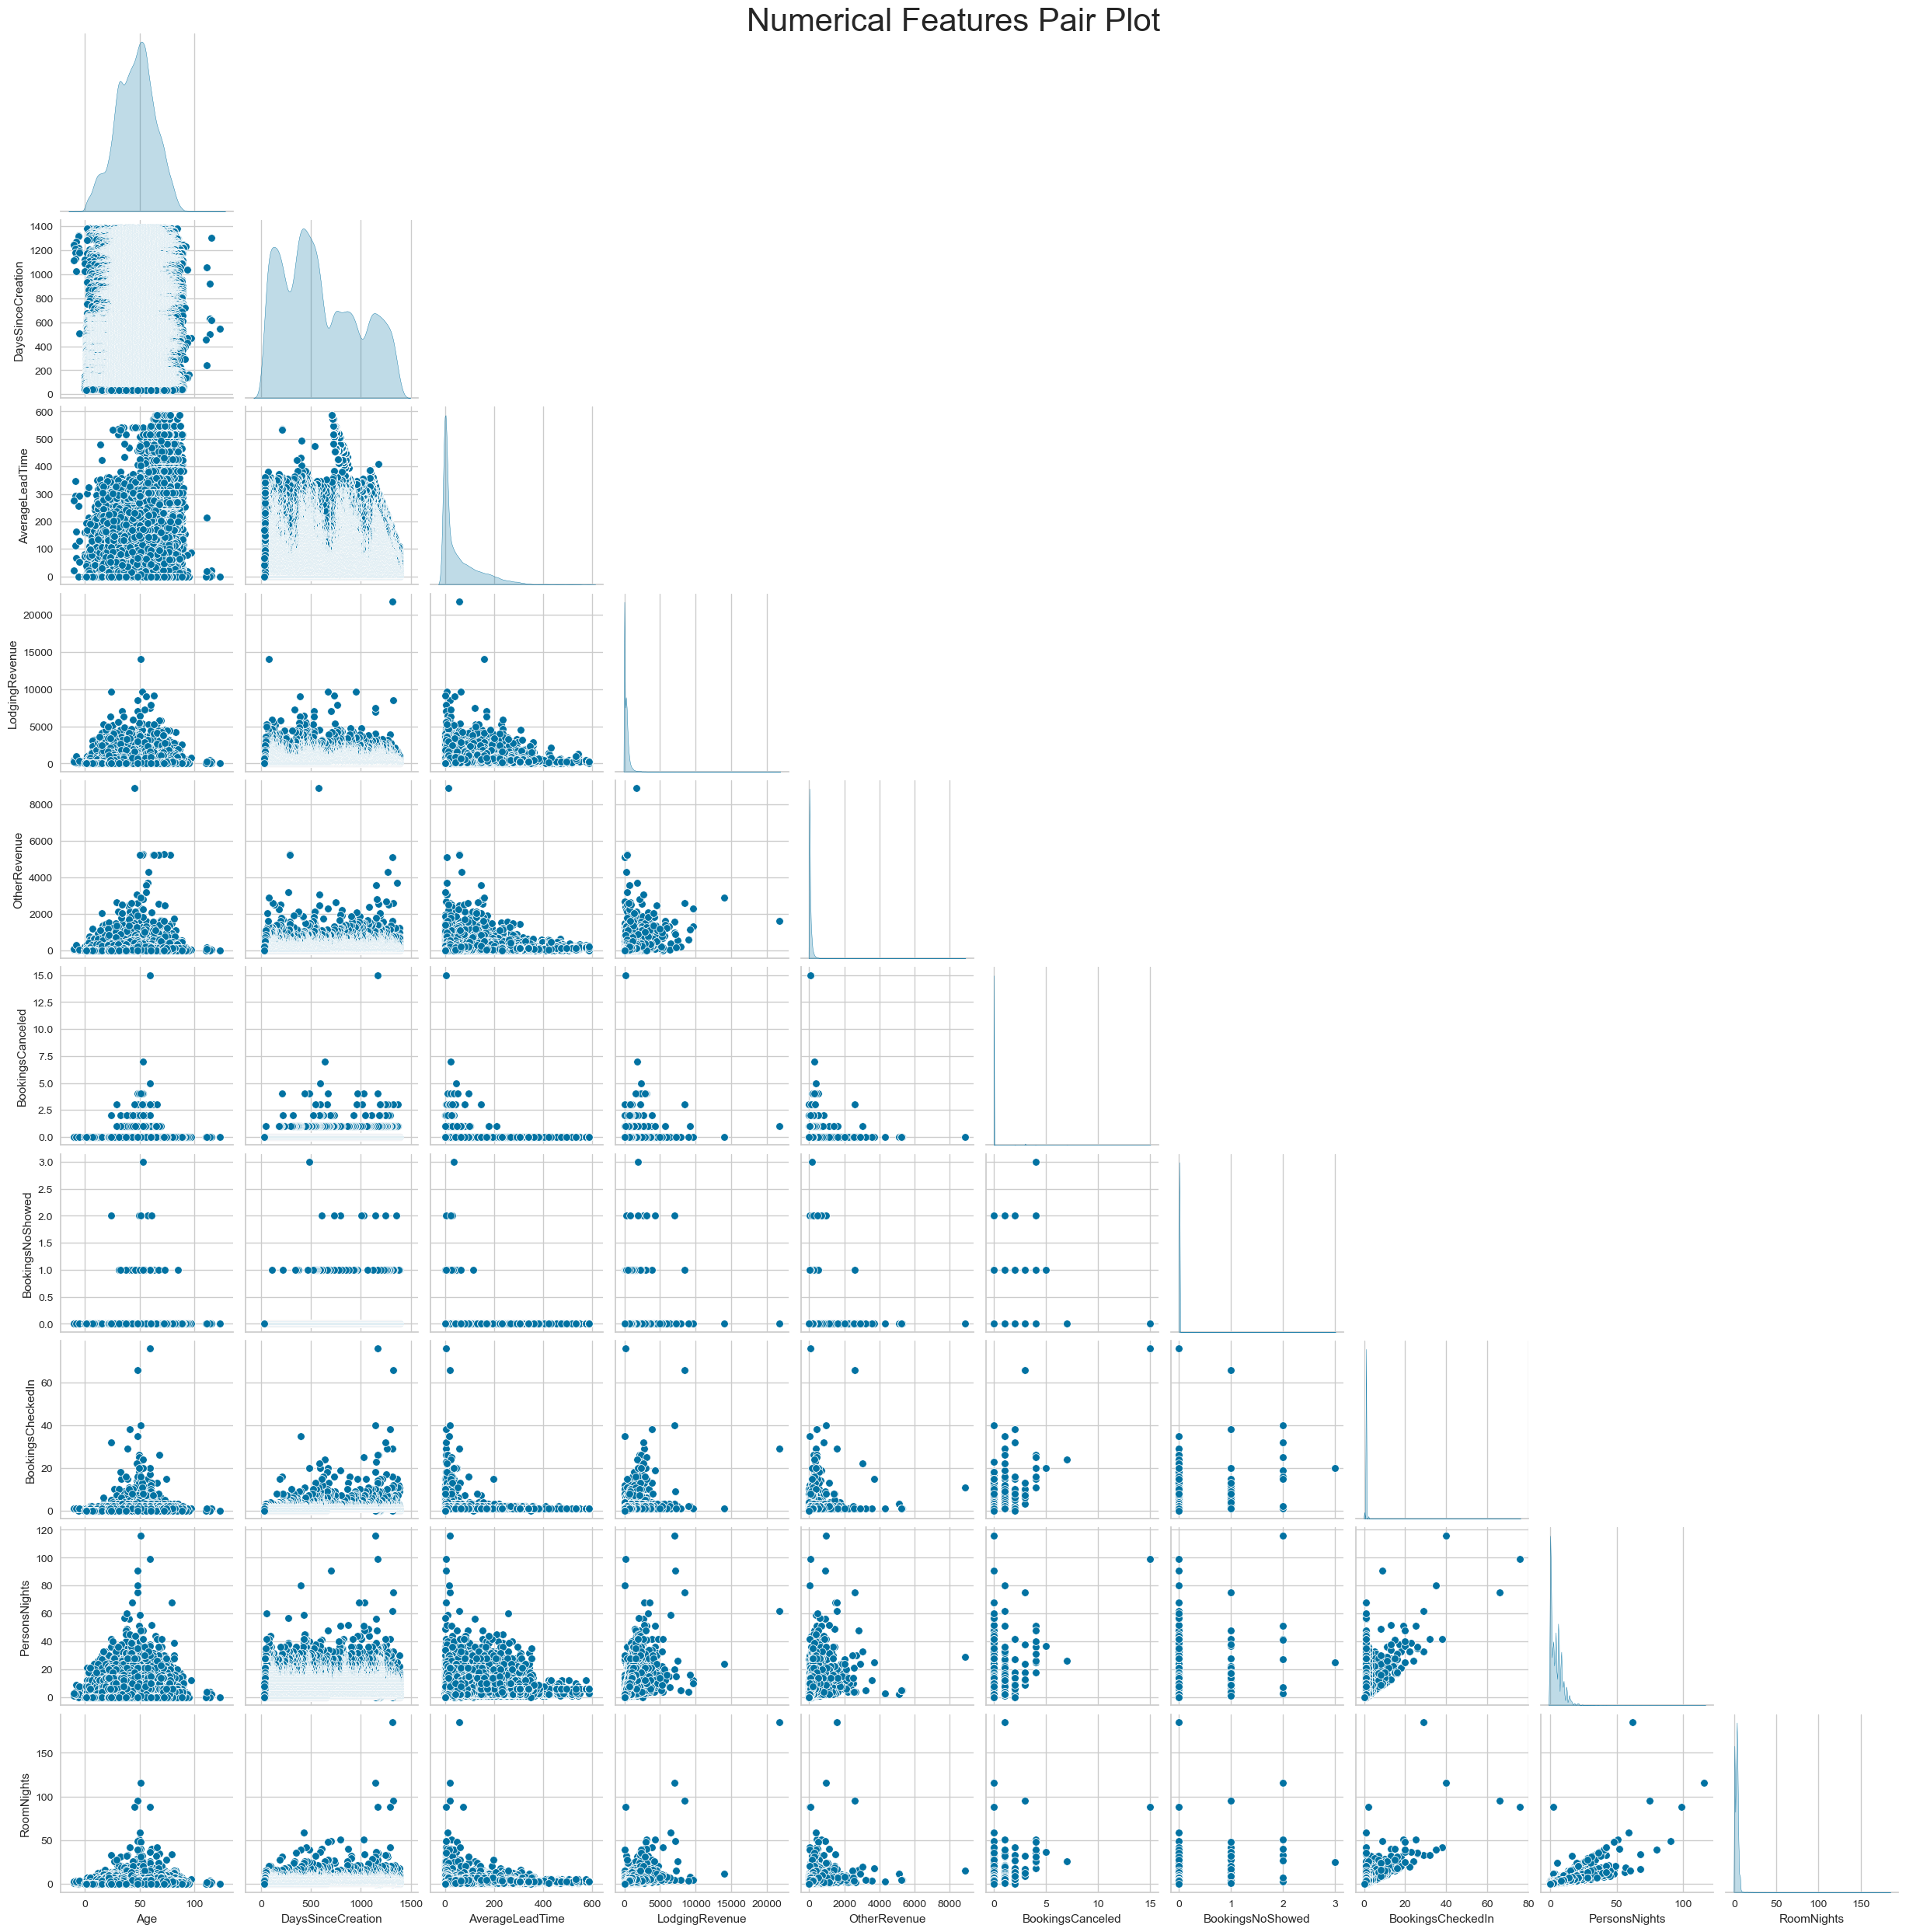

In [21]:
# Pair plot // from: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df[numer], diag_kind="kde", corner=True)


# title
plt.suptitle("Numerical Features Pair Plot", y=1, fontsize=plots_Title_fontSize)

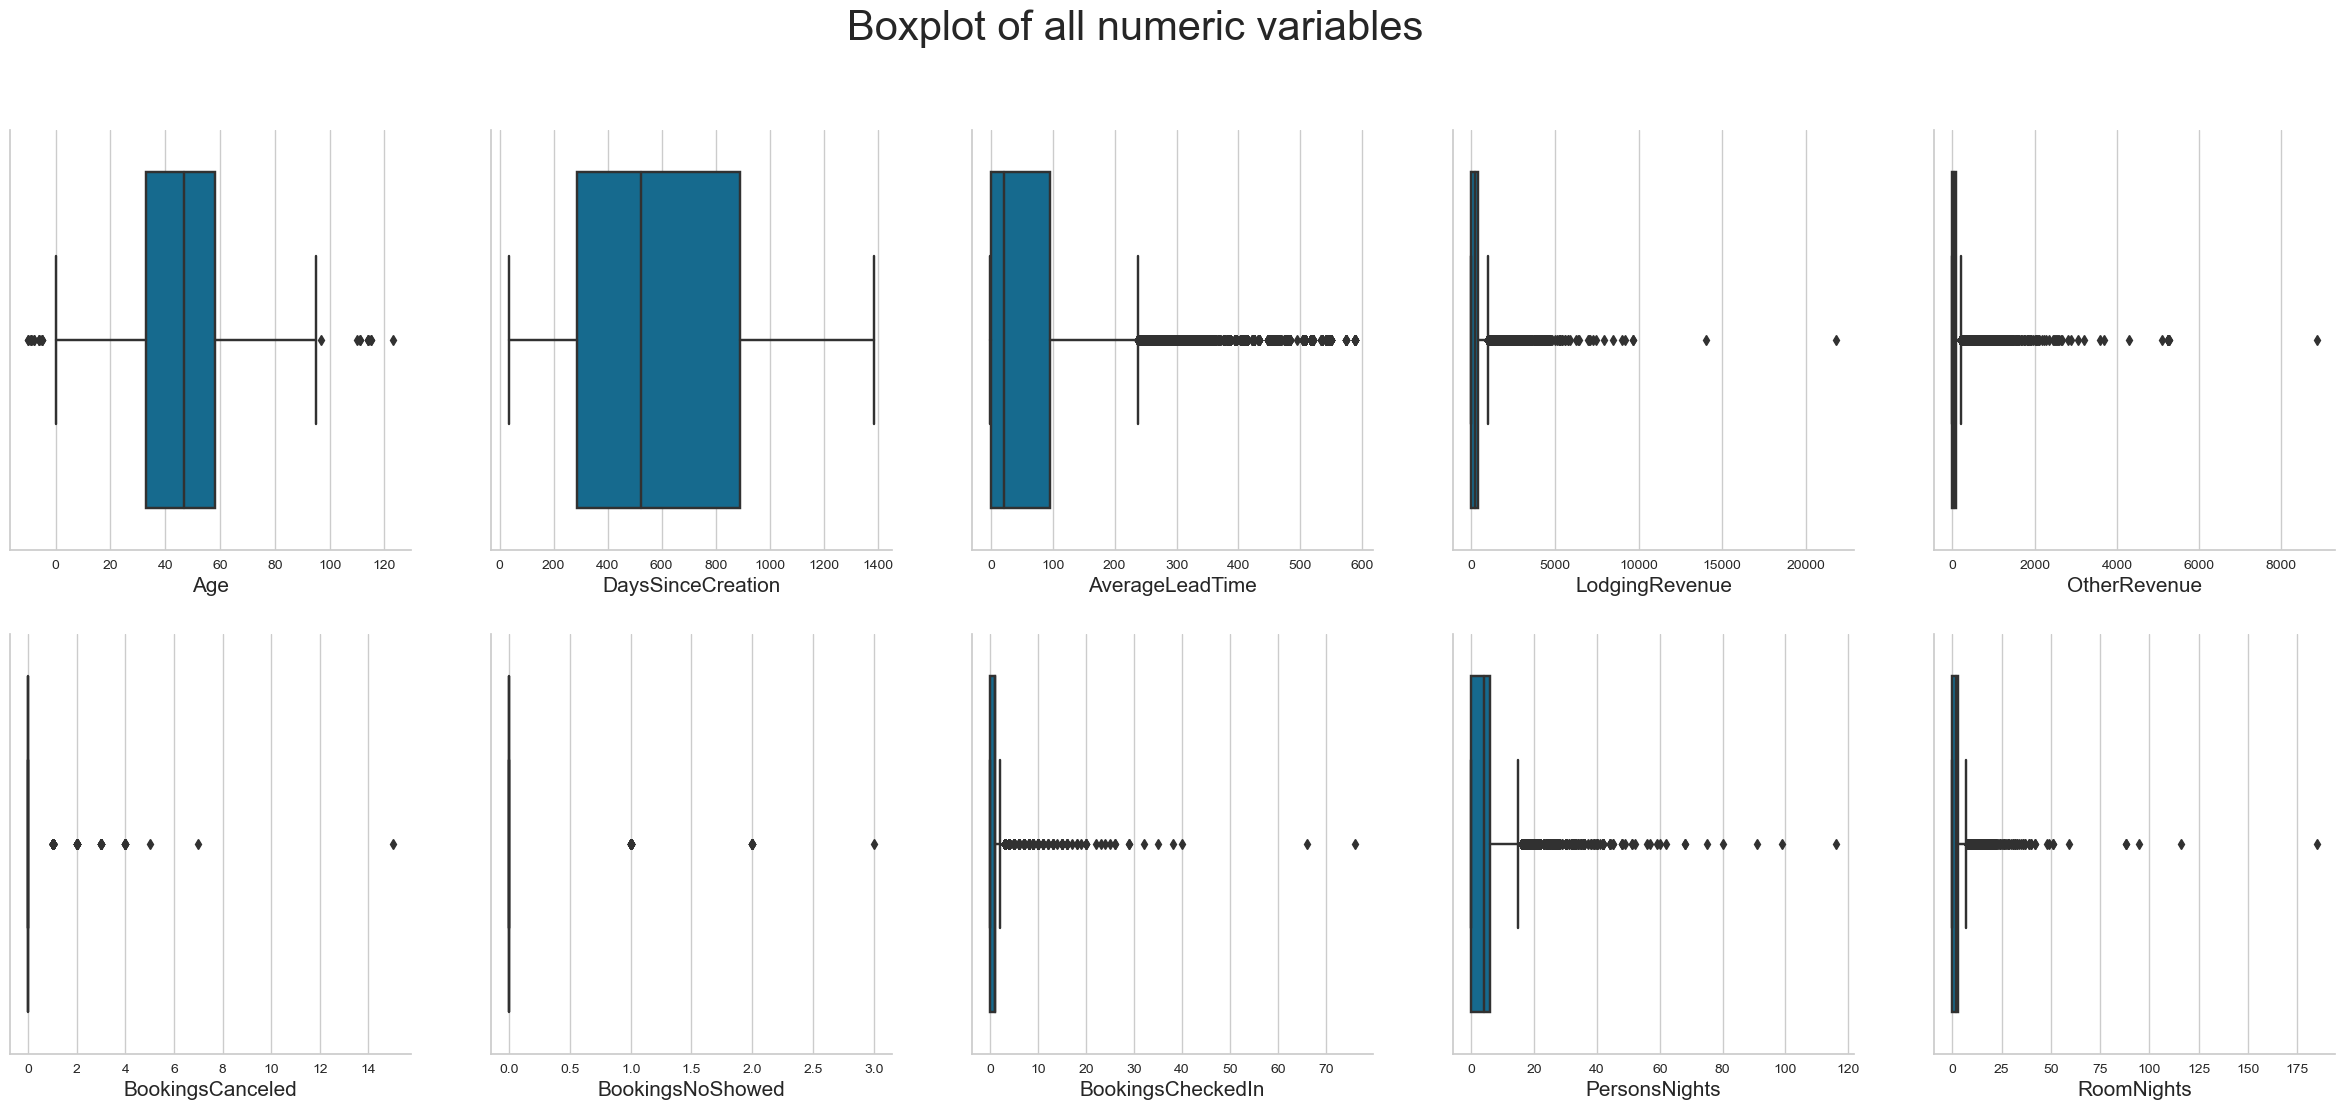

In [22]:
# Box plot // from: teachers notes

fig, ax = plt.subplots(2, 5, figsize=(30,12))
for var, subplot in zip(df[numer], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)
    
    # adjusting labels size
    g.set_xlabel(var, fontsize=15)
    
# Decoration
sns.despine()
plt.rc('axes', labelsize=10)

# title
fig.suptitle("Boxplot of all numeric variables", fontsize=plots_Title_fontSize);

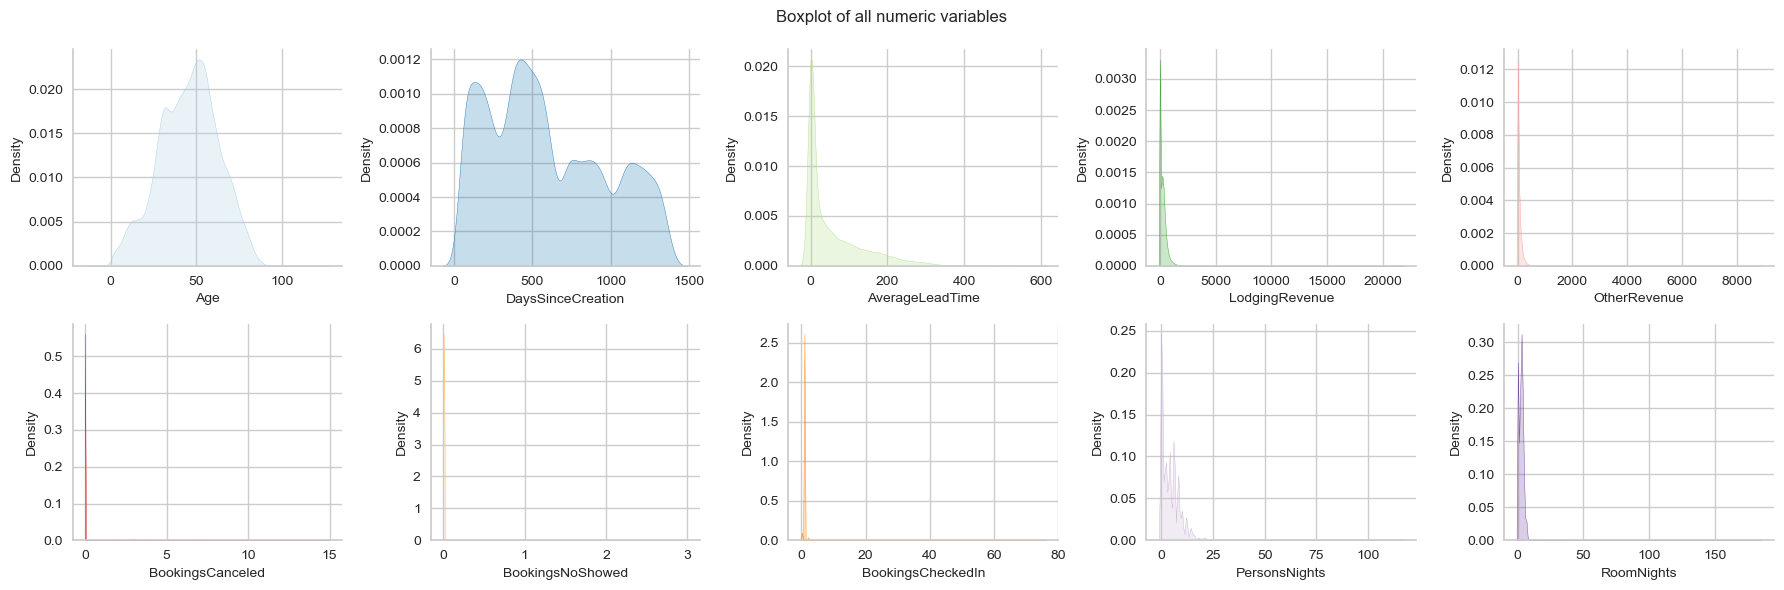

In [23]:
# Box plot // from: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

custom_palette = sns.color_palette("Paired", n_colors=len(df[numer])) # custom palette

fig, ax = plt.subplots(2, 5, figsize=(18, 6))
for i, var in enumerate(df[numer]):
    g = sns.kdeplot(data=df,
                    x=var,
                    ax=ax.flatten()[i],
                    fill=True,
                    color=custom_palette[i])  
    
    # Decoration
    sns.despine()
    ax.flatten()[i].set_xlabel(var, fontsize=10)
    ax.flatten()[i].set_ylabel('Density', fontsize=10)

# Title
fig.suptitle("Boxplot of all numeric variables", fontsize=12)

plt.tight_layout()
plt.show()

- Most variables are highly skewed with the presence of outliers

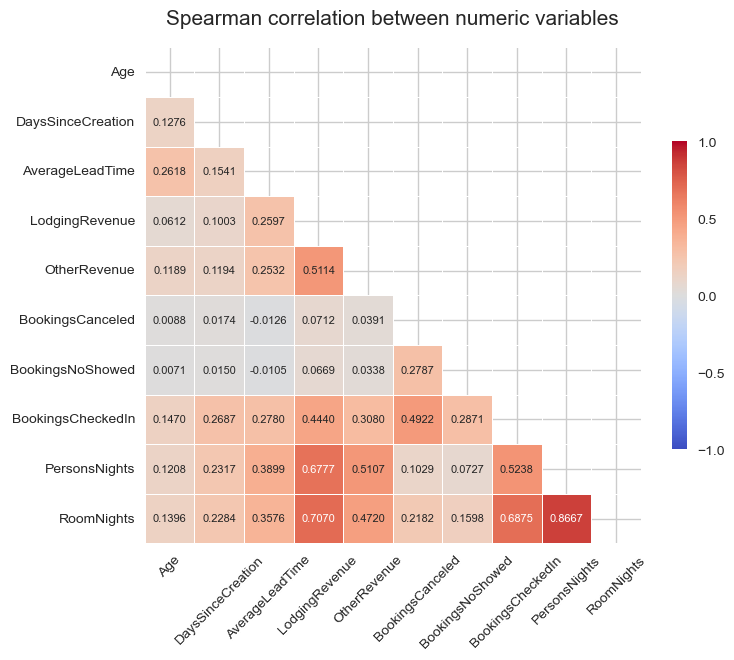

In [24]:
# correlatoion // from: teachers notes

# set correlation of variables
corr = df[numer].corr()

# mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# create correlation matrix
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask=mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=15, y=1.03)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

- *AverageLeadTime* shows a high correlation with 3 other variables, but we believe it is not significant enough to be removed
- *PersonsNights* and *RoomNights* have a high correlation (>85%) so we will need to treat it

#### - Binary

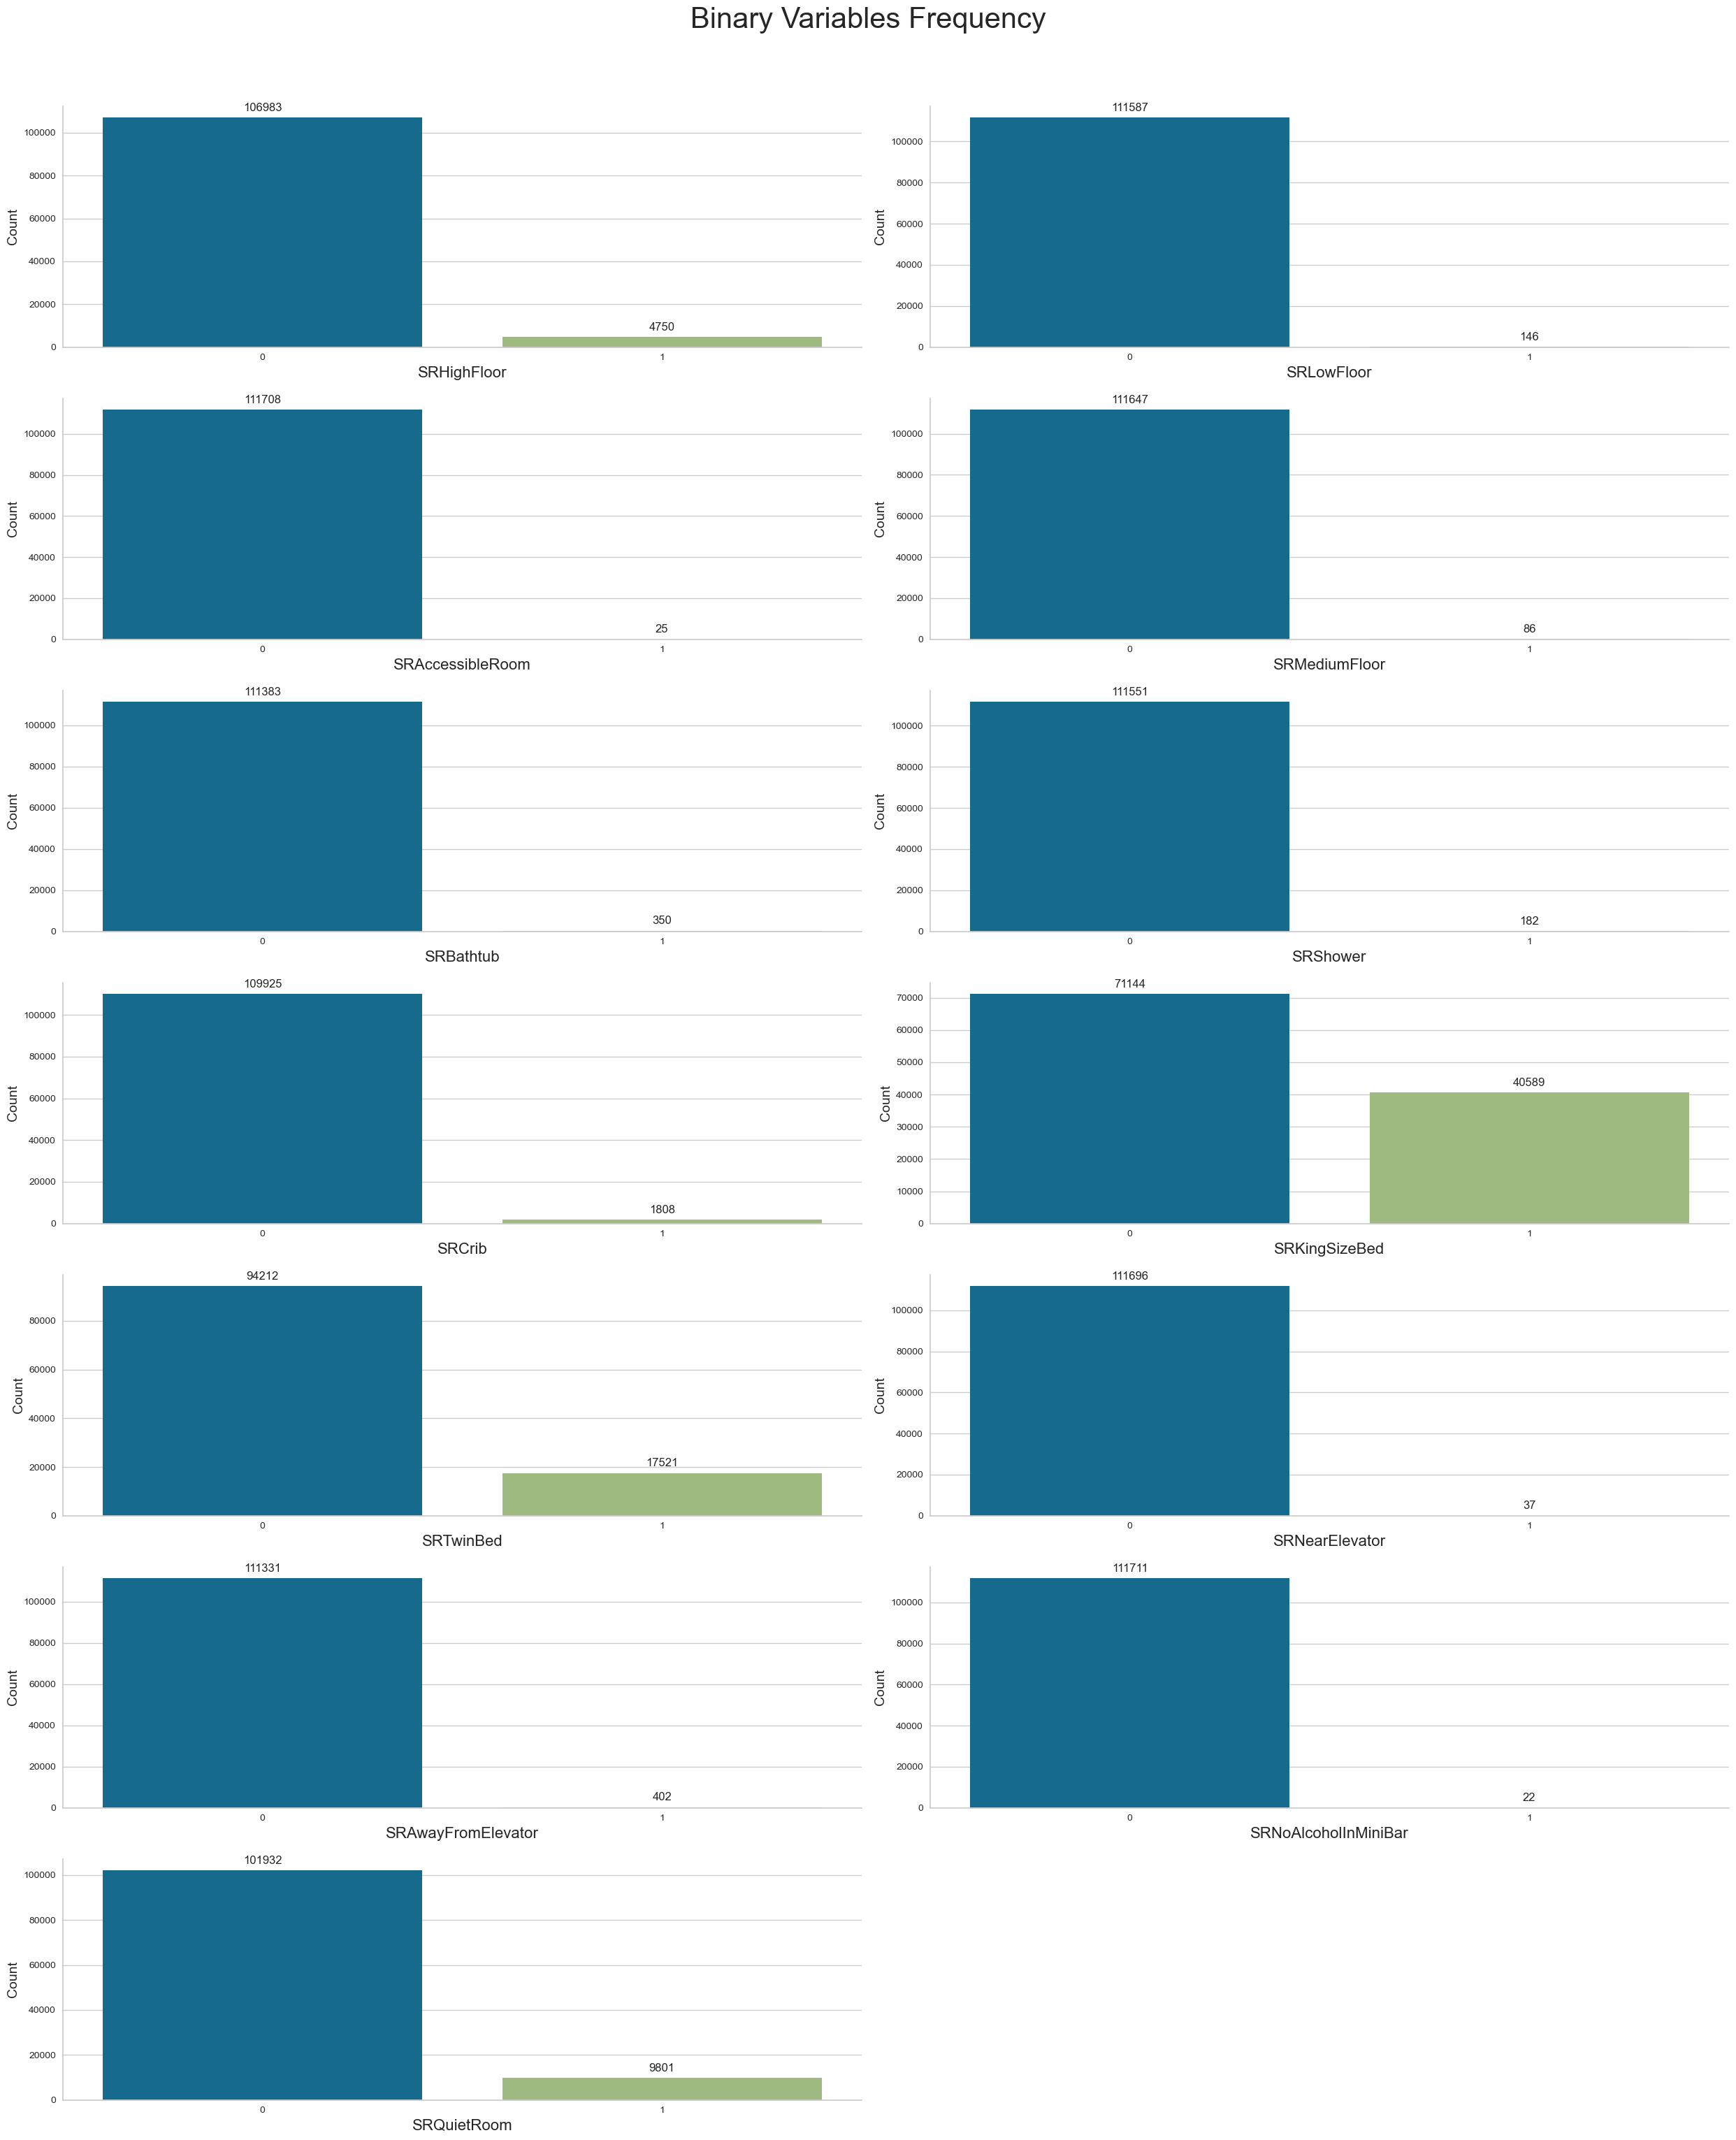

In [25]:
# draw plot // from: teachers notes
fig, ax = plt.subplots(7, 2, figsize=(25,30))

for var, subplot in zip(df[binar], ax.flatten()):
    g = sns.countplot(data=df,
                 x=var,
                 ax=subplot)
    
    # adjusting labels size
    g.set_xlabel(var, fontsize=16)
    g.set_ylabel('Count', fontsize=14)
    
    # add labels to each bar // from: ChatGPT 3.5 generation
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# remove extra plot
ax[-1, -1].remove()

# title
fig.suptitle("Binary Variables Frequency", fontsize=plots_Title_fontSize, y=1.02);

sns.despine() # theme
plt.tight_layout()


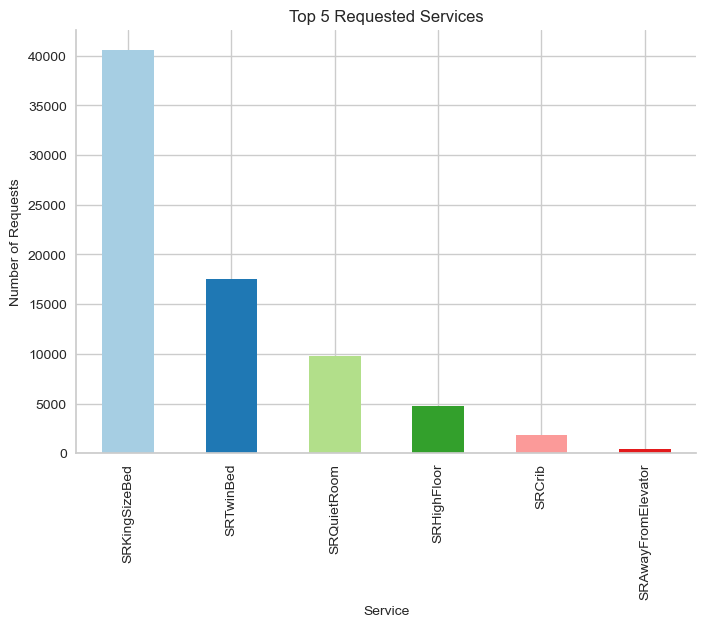

In [26]:
# count the number of times each service was selected
service_counts = df.loc[:,binar].sum()

# sort by count and select the top 5
top_services = service_counts.sort_values(ascending=False)[:6]

# bar chart
ax = top_services.plot(kind='bar', color=sns.color_palette('Paired'))

# decoration
ax.set_title('Top 5 Requested Services')
ax.set_xlabel('Service')
ax.set_ylabel('Number of Requests')

sns.despine()
plt.show()

- Most request are rarely asked for, so their variance is pretty low (making more sense to have one overall Special Request)
- Only *SRTwinBed* and *SRKingSizeBed* have a signifincant number of request

#### - Categorical

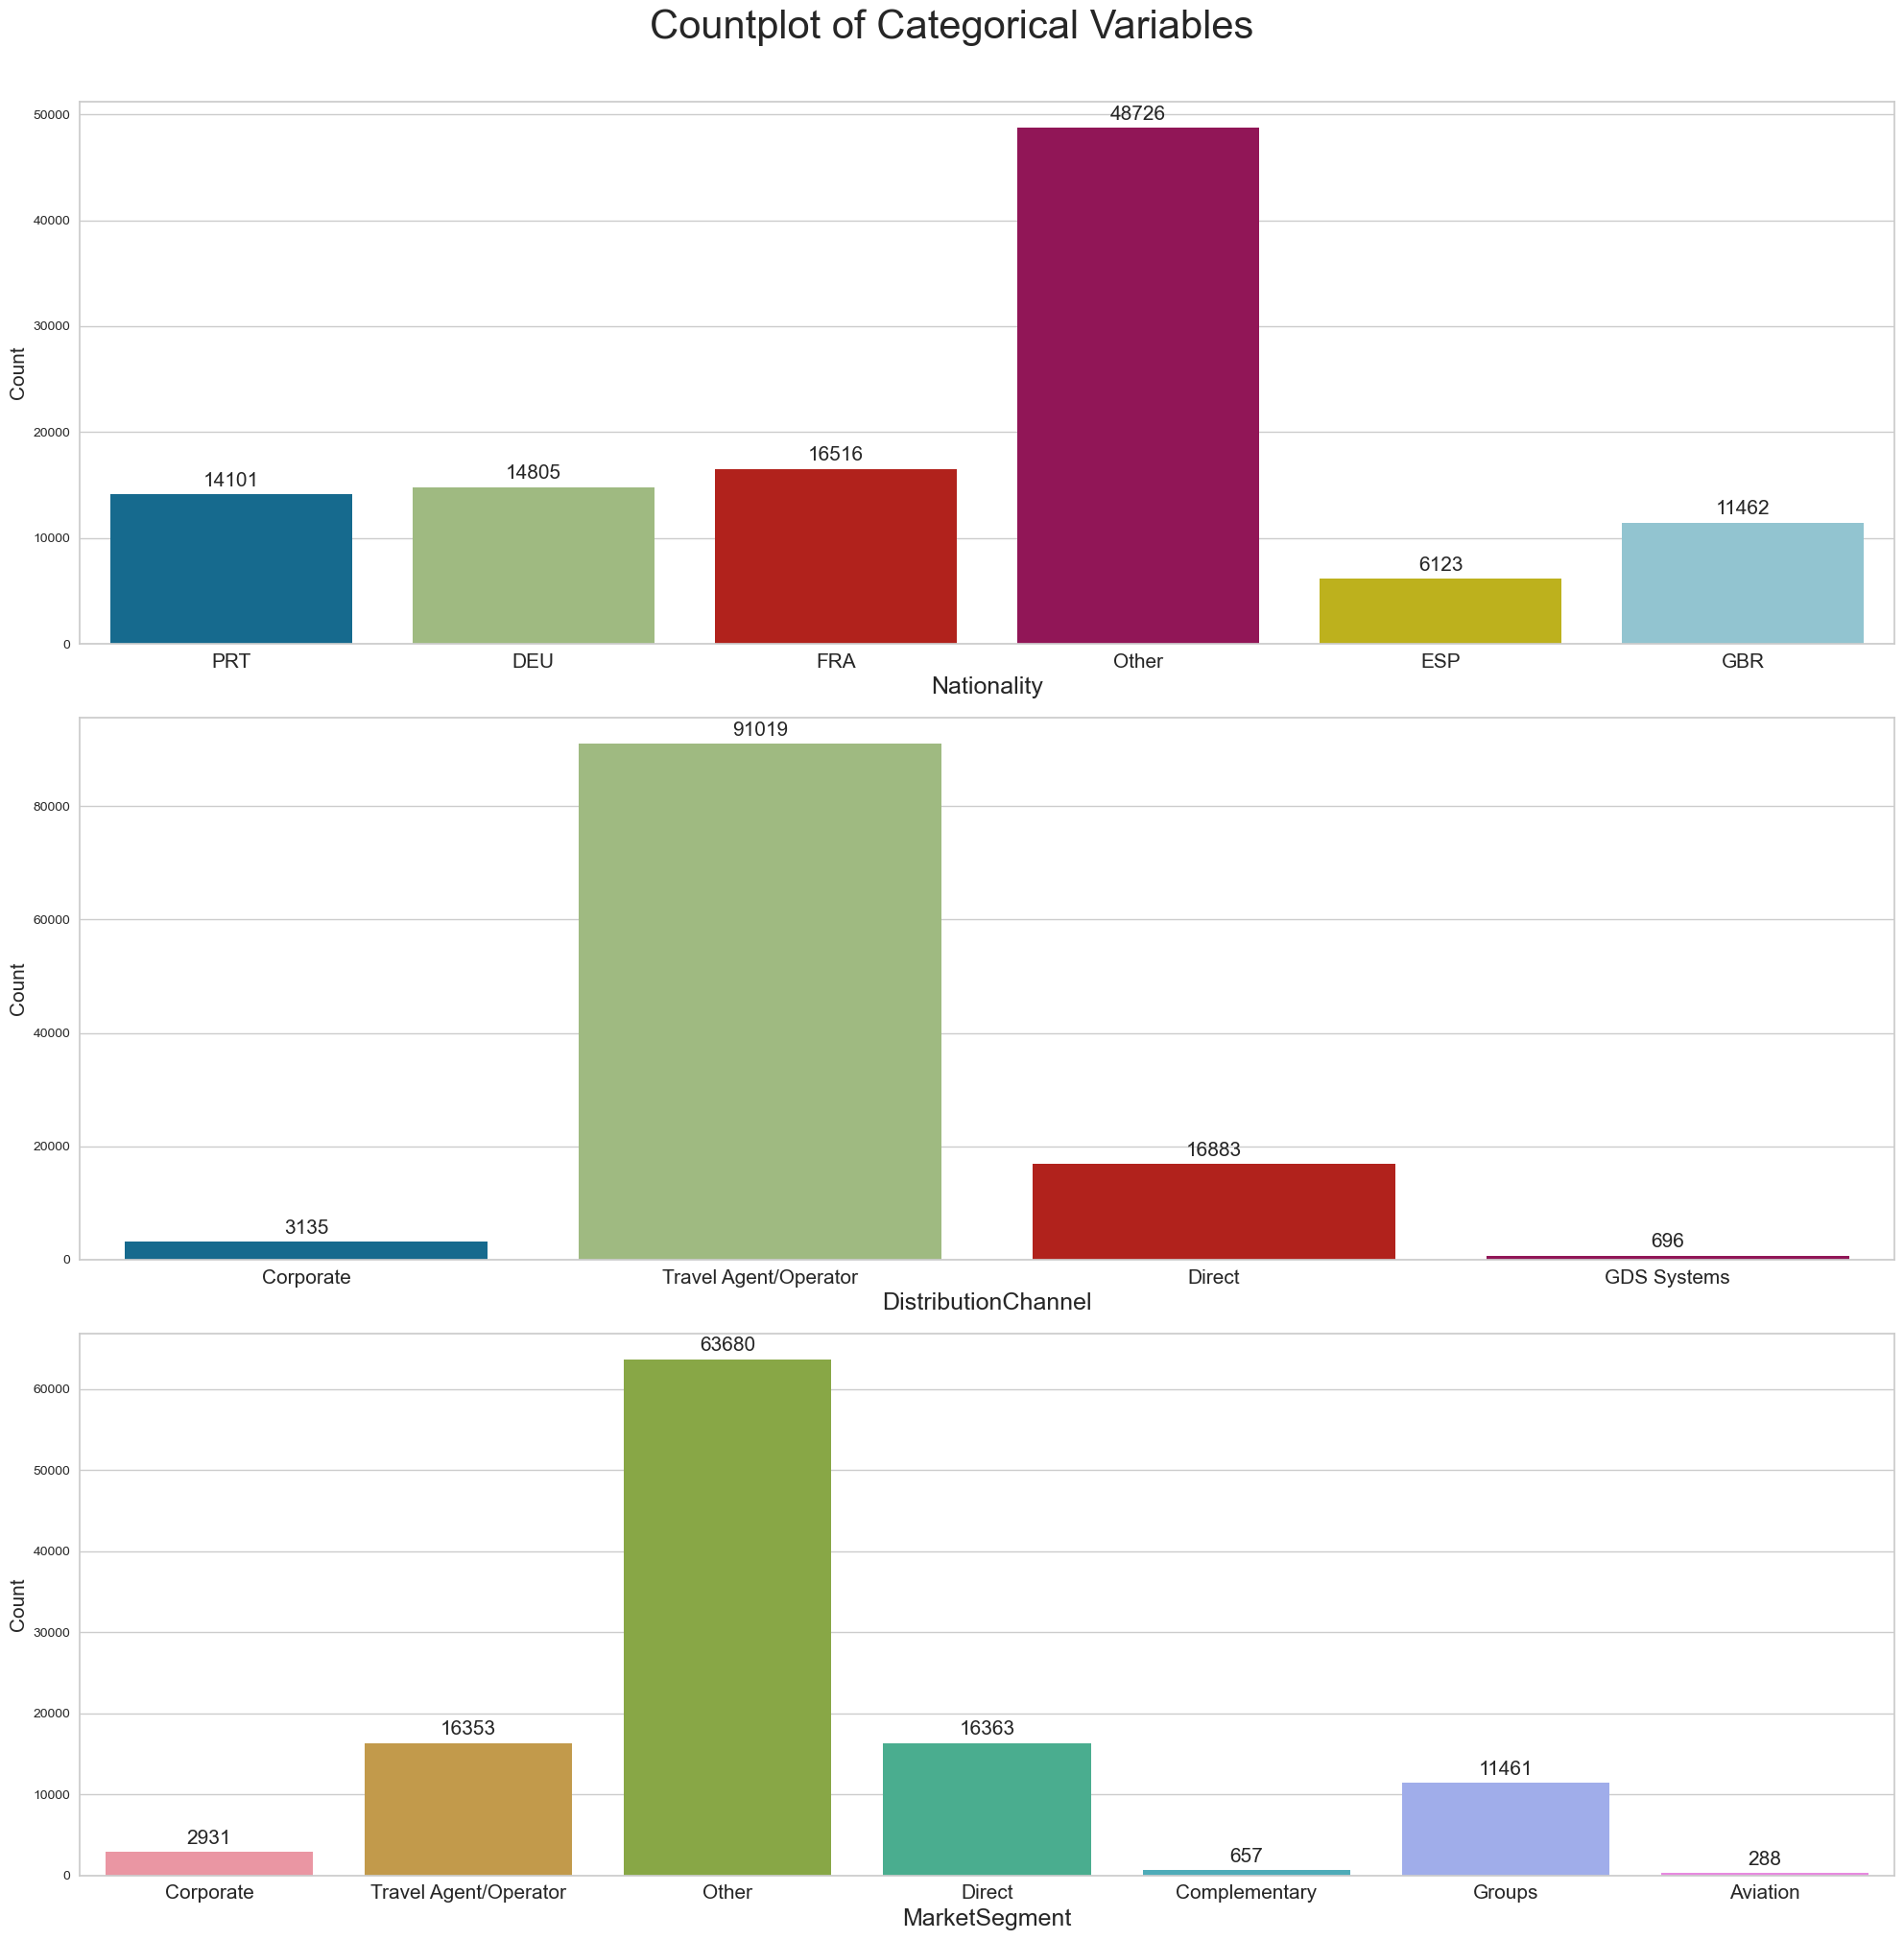

In [27]:
# countplot 
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

for var, subplot in zip(viz_df[cats], ax.flatten()):
    sns.countplot(data=viz_df, x=var, ax=subplot)
    subplot.tick_params(axis='x', labelsize=15)

    # Increase the size of axis labels
    subplot.set_xlabel(var, fontsize=18)
    subplot.set_ylabel("Count", fontsize=15)
    
    # add labels to each bar // from: ChatGPT 3.5 generation
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points',
                         fontsize=15)  


# title
fig.suptitle("Countplot of Categorical Variables", fontsize=30, y=1.01)

plt.tight_layout()
plt.show()

<hr>

<a class="anchor" id="3">

# 3. Data Preprocessing

</a>

In [28]:
# we will be working on a copy of the original dataset
df_pro = df.copy()

#### - Duplicates

In [29]:
# removing all duplicates
df_pro.drop_duplicates(inplace=True)

#### - Correcting Misleading Data

In [30]:
# selecting only customers that checking at least one time
df_pro = df_pro[df_pro['BookingsCheckedIn'] != 0]

- If BookingsCheckedIn is equal to 0 it means that those people were never clients of this hotel (or yet)

In [31]:
# selecting only customers below 96 years mark or above 15 years and keeping missing values
df_pro = df_pro[ ((df_pro['Age'] <= 95) & (df_pro['Age'] >= 16) ) | (df_pro['Age'].isnull())]

# changing all ages that are below first register
df_pro['Age'] = np.where((df_pro['DaysSinceCreation']/365) >= df_pro['Age'], np.nan, df_pro['Age'])

- All ages above 95 were considered misleading since those ages are not plausible considering the avg. life spam of a person, and according to data, there were a jump from 95 to 110 years old, which we considered a typo
- For negative ages and ages below we decided to delete them of the dataset, since we belive negative ages are errors that should not be accounted for. Also since doesn't make sense to work with children we delete their entries too

In [32]:
# setting all default values as NAN
df_pro.loc[df_pro['AverageLeadTime'] == -1, 'AverageLeadTime'] = np.nan

- Average leadtime has the value -1 a few times which we considered to be a default value used so we decided to set as null

In [33]:
# removing cases where the # of rooms X # of nights is smaller than # of check in
df_pro = df_pro[df_pro['BookingsCheckedIn'] <= df_pro['RoomNights']]

# removing cases where the # of person X # of nights is smaller than # of check in
df_pro = df_pro[df_pro['BookingsCheckedIn'] <= df_pro['PersonsNights']]

- For cases were the product of number of rooms by the number of nights is 1, it is necessary to check if customer only checked in once too...
- Same thinking was use for "PersonsNights"

In [34]:
# Removing lines where we have a higher value of RoomNights when compared to PersonsNights
df_pro[df_pro['PersonsNights']<df_pro['RoomNights']]
df_pro = df_pro[df_pro['PersonsNights']>=df_pro['RoomNights']]

- In our understanding does not make sense that for the same number of nights the number of rooms be smaller than the number of persons

**Note:**
- As we treated duplicates and age misleading values, the missing values of DocIDHash were also removed, so no separated treatment is necessary

#### - Simplifying Special Requests

In [35]:
# saving binary variables with mostly 0, or "rare requests"
var_bin = ['SRAccessibleRoom', 'SRAwayFromElevator', 'SRBathtub', 'SRCrib', 'SRHighFloor','SRLowFloor', 
           'SRMediumFloor', 'SRNearElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom', 'SRShower',]

# create function to iterate over list
def check_special_requests(r):
    for c in var_bin:
        if r[c] >= 1:
            return 1
    return 0

# applying function to create new column
df_pro['SpecialRequests']=df_pro.apply(check_special_requests,axis=1)

# drop columns
df_pro = df_pro.drop(var_bin, axis=1)

#### - Organizing the dataset by DocID

In [36]:
# one of the IDs repeat multiple times, considering it as default, we are setting every observation as a null
df_pro.loc[df_pro['DocIDHash'] == '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855', 'DocIDHash'] = np.nan

In [37]:
# we are splitting the dataset into two where one has all DocIDHash as nan
df_nan = df_pro[df_pro['DocIDHash'].isna()]
df_not_nan = df_pro[~df_pro['DocIDHash'].isna()]

- Considering DocIDHash one of the factors to deciding whether or not the data is truthful and the fact that neither of this transactions came from the same NameHash. It was decided that adding back these transactions back into the data made little sense so they were dropped.

In [38]:
# order dataaset by days of creation of account, to recent accounts appear first
df_agg = df_not_nan.sort_values(by="DaysSinceCreation", ascending=True)

# defining solution for undefined columns
others= df_agg.columns.difference(['DocIDHash','NameHash','Nationality','Age','DaysSinceCreation',
                                   'MarketSegment', 'AverageLeadTime', 'SpecialRequests',
                                   'SRKingSizeBed','SRTwinBed', 'DistributionChannel'])
# grouping by DocID, Nac, Name
df_agg = df_agg.groupby(['DocIDHash', 'NameHash', 'Nationality']).agg({
    'Age': 'max',
    'DaysSinceCreation': 'max',
    'MarketSegment': lambda x: x.iloc[0],
    'AverageLeadTime': 'mean',
    'SpecialRequests': 'max',
    'SRKingSizeBed': 'max',
    'SRTwinBed': 'max',
    'DistributionChannel': lambda x: x.iloc[0],
    **{column: 'sum' for column in others}
})

# reseting index
df_agg.reset_index(drop=False, inplace=True)
df_agg.head()

,DocIDHash,NameHash,Nationality,Age,DaysSinceCreation,MarketSegment,AverageLeadTime,SpecialRequests,SRKingSizeBed,SRTwinBed,DistributionChannel,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,FRA,60.0,480,Direct,64.0,1,1,0,Direct,0,2,0,495.0,162.0,6,3
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,DEU,54.0,1197,Other,14.0,1,1,0,Travel Agent/Operator,0,1,0,695.0,100.0,10,5
2,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,ESP,53.0,755,Other,56.0,0,0,0,Travel Agent/Operator,0,1,0,165.0,12.0,3,1
3,0x0002ED07243C5575B6A6FBD42EF80DE8006E0CFDC21C...,0x32495BCAB9E02E2FD0C1649616A21F555F0BF827F0E2...,FRA,33.0,673,Other,2.0,0,0,0,Travel Agent/Operator,0,1,0,237.0,71.6,3,3
4,0x000394A95AC0BF307557B6BEFBE3F9442BD500BA48B4...,0xCF1C902D3589B2F8C1C3CC4DEB024EDADFCEBF44E782...,DEU,31.0,94,Travel Agent/Operator,179.0,0,1,0,Travel Agent/Operator,0,1,0,168.0,66.0,2,2


#### - Creating New Variables

In [39]:
# total revenue from both types of revenues
df_agg['TotalRevenue'] = df_agg.apply(lambda x: x['LodgingRevenue']+x['OtherRevenue'], axis=1)

In [40]:
# creating invalid bookings (from canceled and no showed)
df_agg['InvalidBookings'] = df_agg.apply(lambda x: 1 if x['BookingsCanceled'] == 1 
                                                  or x['BookingsNoShowed'] == 1 else 0, axis=1)

- we will be removing the variables that were used to create these new, otherwise would create multicolinearity

#### - From Categorical to Binary

In [41]:
# creating function to perform one-hot encoding // from: teachers notes
def one_hot(col, threshold, prefix):
    
    #one-hot encoding for categories above a threshold and create a dummy column for all others named "Other"
    
    # check dummies for the column
    dum = pd.get_dummies(col)

    # check if percentage is below threshold and act accordingly
    f = pd.value_counts(col, sort=False, normalize=True) < threshold
    
    if f.sum() == 0:
        newSeries = dum
    else:
        newSeries = dum.loc[:, ~f].join( dum.loc[:, f].sum(1).rename('Other') )
    
    # add the prefix and return the result    
    newSeries = newSeries.add_prefix(prefix)
    
    return newSeries

In [42]:
# one hot encoding of all categories above 5% - all others categories to "Other"
cols = ['DistributionChannel', 'Nationality']

for i in range(len(cols)):
    
    columns = df_agg[cols[i]].astype(str)
    
    procDF = one_hot(columns, .05, cols[i]+'_') # enconding for each value
    
    df_agg = pd.concat([df_agg, procDF], axis=1)

#### - Missing Values Imputation

In [43]:
# reviewing missing values
df_agg.isnull().sum()

DocIDHash                                      0
NameHash                                       0
Nationality                                    0
Age                                          244
DaysSinceCreation                              0
MarketSegment                                  0
AverageLeadTime                               12
SpecialRequests                                0
SRKingSizeBed                                  0
SRTwinBed                                      0
DistributionChannel                            0
BookingsCanceled                               0
BookingsCheckedIn                              0
BookingsNoShowed                               0
LodgingRevenue                                 0
OtherRevenue                                   0
PersonsNights                                  0
RoomNights                                     0
TotalRevenue                                   0
InvalidBookings                                0
DistributionChannel_

In [44]:
# imputer with logistic regressions // from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# define the imputer
imputer = IterativeImputer(estimator=LogisticRegression(), max_iter=10, random_state=5)

# variable to impute
age_variable = ['Age']

# apply imputation
df_agg[age_variable] = imputer.fit_transform(df_agg[age_variable])

In [45]:
# same but for average lead time
imputer = IterativeImputer(estimator=LogisticRegression(), max_iter=10, random_state=5)

leadtime_variable = ['AverageLeadTime']

# apply imputation
df_agg[leadtime_variable] = imputer.fit_transform(df_agg[leadtime_variable])

- Since the numbers of missing values of the treated data is relatively small, we decided that using a simple logitic regression would be enough to fill those missings

#### - Binning Numerical Data

- First we want to analyze the section of numerical data, to decide on how to treat and how it should be incorporated in our model

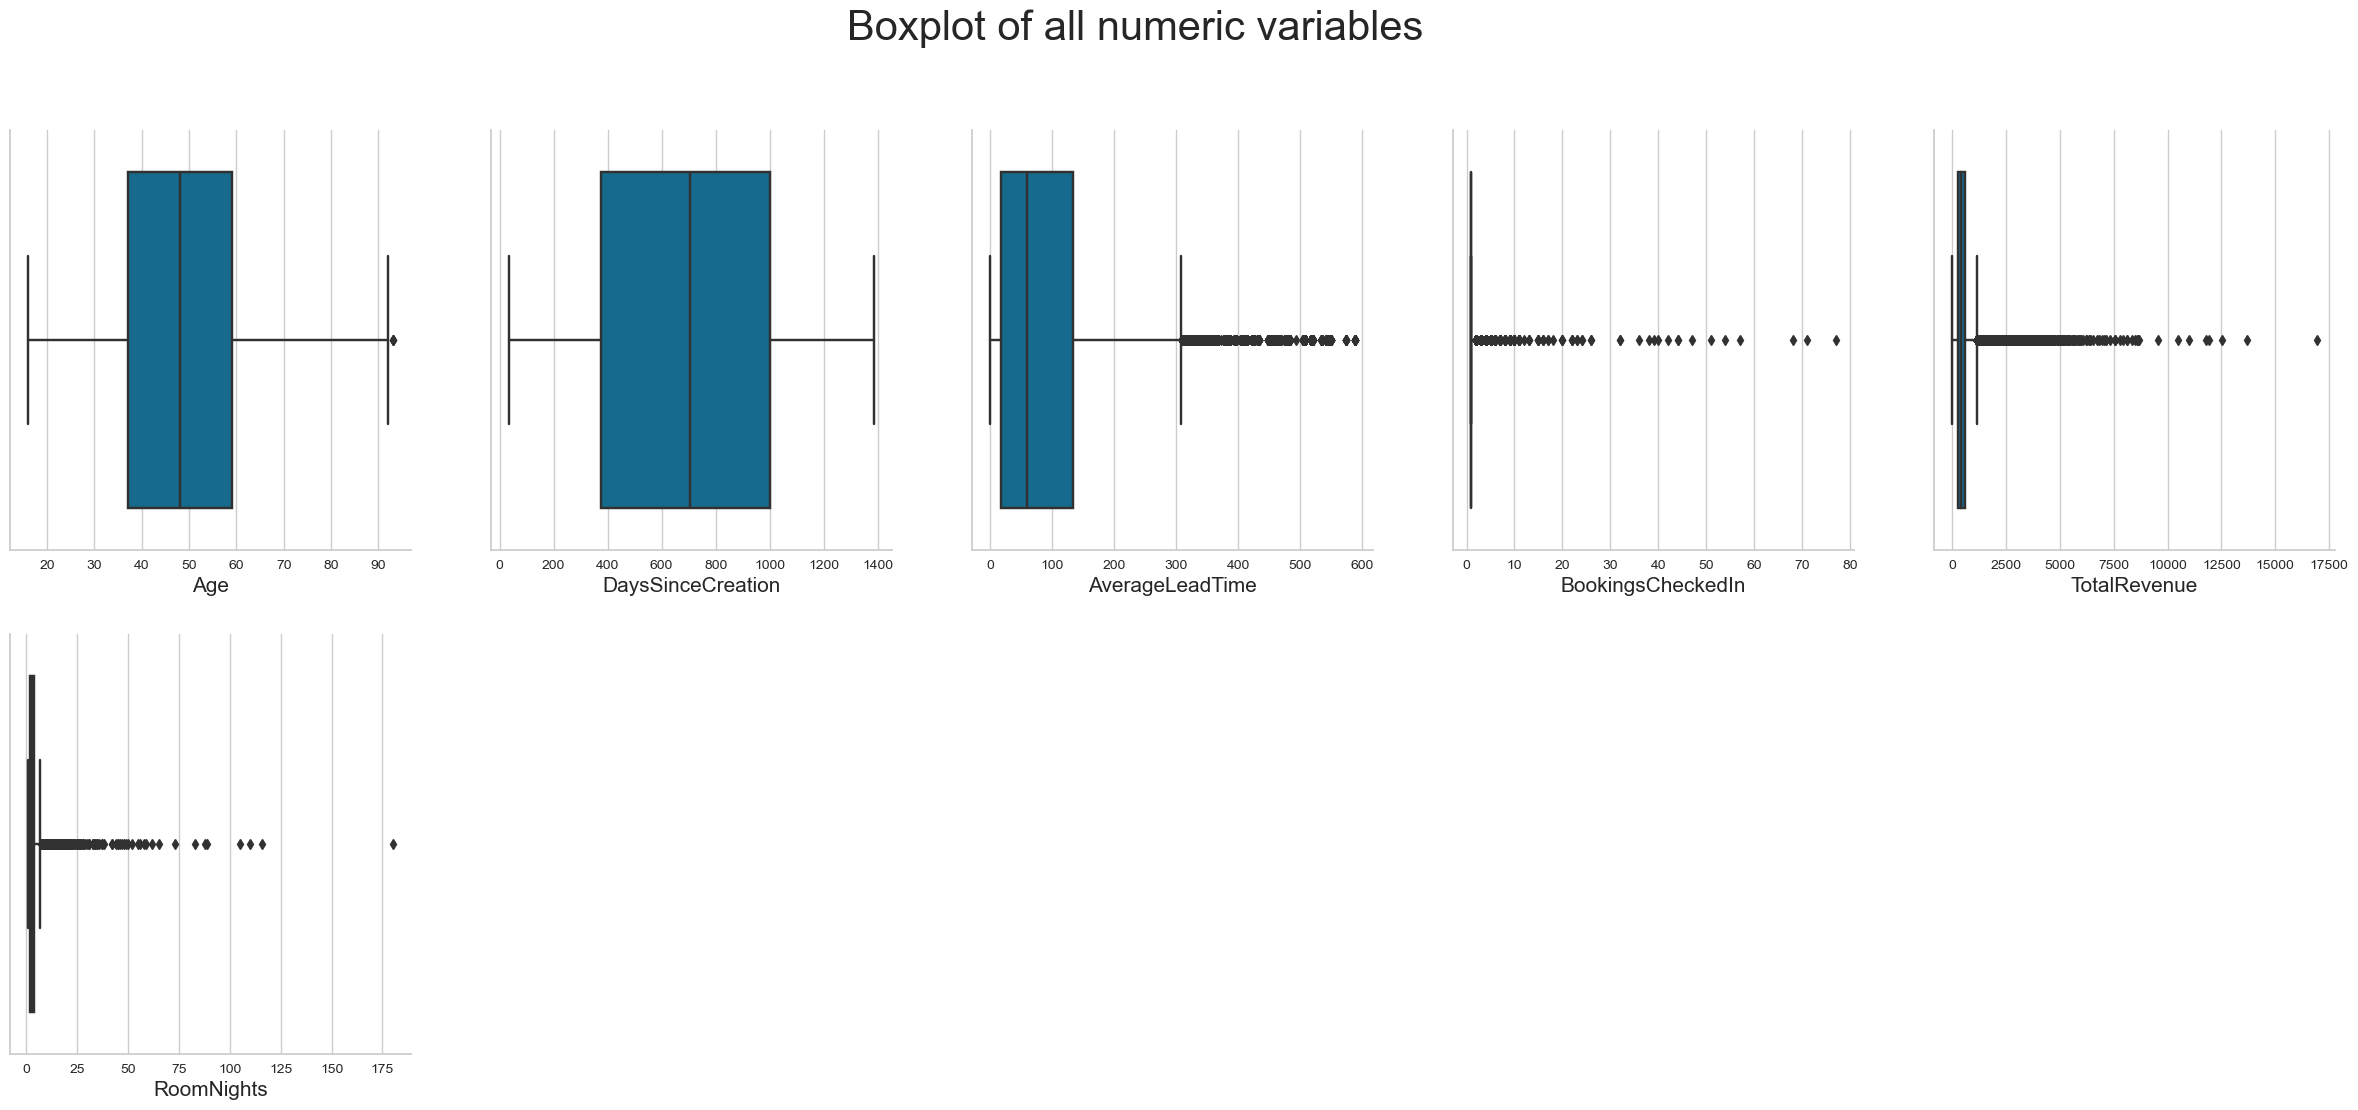

In [46]:
# filter numerical columns
numerical_columns = ["Age","DaysSinceCreation","AverageLeadTime","BookingsCheckedIn", "TotalRevenue","RoomNights"]

fig, ax = plt.subplots(2, 5, figsize=(30,12))

# iterate over numerical columns
for var, subplot in zip(numerical_columns, ax.flatten()):
    g = sns.boxplot(data=df_agg,
                    x=var,
                    ax=subplot)
    
    g.set_xlabel(var, fontsize=15)

# decoration
sns.despine()
plt.rc('axes', labelsize=10)

# title
fig.suptitle("Boxplot of all numeric variables", fontsize=plots_Title_fontSize)

# remove extra plot
ax[-1, -1].remove()
ax[-1, -2].remove()
ax[-1, -3].remove()
ax[-1, -4].remove()


plt.show()

In [47]:
# overall stats
df_agg[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,72751.0,48.367647,14.889735,16.0,37.0,48.0,59.0,93.0
DaysSinceCreation,72751.0,685.388682,375.151074,36.0,374.0,706.0,1001.0,1385.0
AverageLeadTime,72751.0,88.565434,90.127012,0.0,18.0,59.0,134.0,588.0
BookingsCheckedIn,72751.0,1.078336,0.895307,1.0,1.0,1.0,1.0,77.0
TotalRevenue,72751.0,512.343478,484.635383,0.0,252.0,396.0,609.0,16936.3
RoomNights,72751.0,3.245454,2.345158,1.0,2.0,3.0,4.0,180.0


- Except for the variable *Age* and *DaysSinceCreation* all other numerical variables present a highly skewed tail to the right, and some with the present of outliers
- We though that all observations were important enough to keep so we did not remove or try thresholding, even though some customers are outliers, we believe they are important to take note and have track
- All variables have different scales (years, days, money, or units)
- So we decided that the best approach was to bin the numerical, we lose a bit of information about the distance between points (specially *Revenue* and *Age*) but since the model is mostly binary variables and all other considerations, we though it would be the best

In [48]:
# bining the age
df_agg['Age_bins'] = pd.cut(x=df_agg['Age'], bins=[-1, 29, 39, 49, 59, 99], labels=['<30','30-39', '40-49', '50-59','>=60'])

- we decide to use predifined bins 

In [49]:
# binning the  customer tenure
df_agg['CustomerTenure'] = pd.cut(x=df_agg['DaysSinceCreation'], bins=[-1, 365, 730, 1095, 1400], labels=['<1year','1-2years','2-3years','+3years'])

In [50]:
# binning the lead time
df_agg['AverageLeadTime_bins'] = pd.cut(x=df_agg['AverageLeadTime'], bins=[-1, 60, 180, 589], labels=['<2months','2-6months','+6months'])

- For *DaysSinceCreation* we change the name, since it transmites a better idea of the meaning of the values, how recent is the customer
- For both, we used predifined bins, but trying to fit around the quartiles of each, in order to have meaningful groups, but also representative enough at some level

<Axes: xlabel='OneTimeCustomers', ylabel='count'>

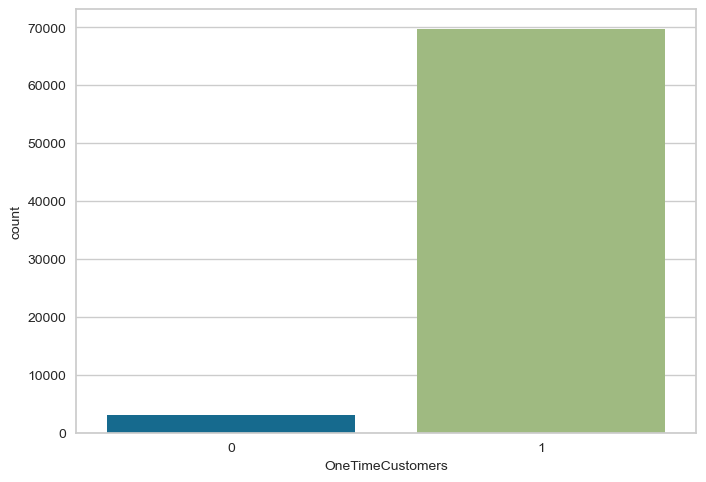

In [51]:
# transform Bookings Checke-In into One-Time Customers
df_agg['OneTimeCustomers'] = df_agg.apply(lambda x: 1 if x['BookingsCheckedIn'] == 1 else 0, axis=1).astype("int")
sns.countplot(data=df_agg, x='OneTimeCustomers')

- Most customers in the dataset are one time customers, with only 1 check in untill the last entry
- In order to respond to this, we created a binary variable
- Even though there is a clear distance between customers with a frequency of 10 and a frequency of 70... there are not enought customers to create a significant variable or impact that will show in the cluster results

In [52]:
# getting quartiles of TotalRevenue
min1, q1, median, q3, max1 = df_agg['TotalRevenue'].quantile([0, 0.25, 0.5, 0.75,1])

# binning by quartile
df_agg['TotalRevenue_bins'] = pd.cut(x=df_agg['TotalRevenue'], bins=[min1-1, q1, median, q3, max1], labels=['<Q1','Q1-Q2','Q2-Q3','>Q3'])

- Due to the highlyy skewed nature of the variable, we used equal-frequency bins

In [53]:
# roomNights
df_agg['RoomNights_bins'] = pd.cut(x=df_agg['RoomNights'], bins=[-1,10,400], labels=['<=10','>10'])

- Again, most observation are below the 10 unit mark, so it make more sense to separate this way

In [54]:
# create dummies // from: ChatGPT 3.5 generation
# initialize encoder, dropping first category
ohc = OneHotEncoder(sparse=False, drop="first") 

# transform selected columns
ohc_feat = ohc.fit_transform(df_agg[['Age_bins','CustomerTenure','AverageLeadTime_bins','TotalRevenue_bins', 
                                     'RoomNights_bins']])
# save names
ohc_feat_names = ohc.get_feature_names_out()

# create dataframe for the feature with same index
ohc_feat = pd.DataFrame(ohc_feat, index=df_agg.index, columns=ohc_feat_names)  

# concat new features to old dataset
df_agg=pd.concat([df_agg,ohc_feat],axis=1)

#### - Removing Unecessary cols

In [55]:
df_final = df_agg.copy()

# remove personal information of customer
df_final.drop(["NameHash", "DocIDHash"], axis=1, inplace=True)

# remove variables used to create new vars and dummies
df_final.drop(["Age", "AverageLeadTime", "DaysSinceCreation", "BookingsCanceled", "BookingsCheckedIn", 
             "BookingsNoShowed", "LodgingRevenue", "OtherRevenue", "TotalRevenue", "Age_bins",
             "CustomerTenure", "AverageLeadTime_bins", "TotalRevenue_bins",
             "RoomNights_bins", "Nationality", "DistributionChannel"], axis=1, inplace=True)

# remove Market Segmentation because we are creating a new one!
df_final.drop("MarketSegment", axis=1, inplace=True)

# remove due to high correlation with variables
df_final.drop(["PersonsNights"], axis=1, inplace=True)

In [56]:
df_final

,SpecialRequests,SRKingSizeBed,SRTwinBed,RoomNights,InvalidBookings,DistributionChannel_Direct,DistributionChannel_Travel Agent/Operator,DistributionChannel_Other,Nationality_DEU,Nationality_ESP,Nationality_FRA,Nationality_GBR,Nationality_PRT,Nationality_Other,OneTimeCustomers,Age_bins_40-49,Age_bins_50-59,Age_bins_<30,Age_bins_>=60,CustomerTenure_1-2years,CustomerTenure_2-3years,CustomerTenure_<1year,AverageLeadTime_bins_2-6months,AverageLeadTime_bins_<2months,TotalRevenue_bins_>Q3,TotalRevenue_bins_Q1-Q2,TotalRevenue_bins_Q2-Q3,RoomNights_bins_>10
0,1,1,0,3,0,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,5,0,0,1,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,0,3,0,0,1,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,2,0,0,1,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72746,0,0,1,2,0,0,1,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
72747,0,0,1,3,0,0,1,0,0,0,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
72748,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72749,0,1,0,7,0,0,1,0,0,0,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


#### - Renaming columns

In [57]:
# define a dictionary to change column names
column_names_dict = {
    'SpecialRequests': 'Special Requests',
    'SRKingSizeBed': 'King Size Bed Requests',
    'SRTwinBed': 'Twin Bed Requests',
    'InvalidBookings': 'Invalid Bookings',
    'DistributionChannel_Direct': 'Direct Distribution Channel',
    'DistributionChannel_Travel Agent/Operator': 'Travel Agent/Operator Dist.',
    'DistributionChannel_Other': 'Other Distribution Channel',
    'Nationality_DEU': 'German',
    'Nationality_ESP': 'Spanish',
    'Nationality_FRA': 'French',
    'Nationality_GBR': 'British',
    'Nationality_PRT': 'Portuguese',
    'OneTimeCustomers': 'One-Time Customers',
    'Age_bins_30-39': 'Age 30-39',
    'Age_bins_40-49': 'Age 40-49',
    'Age_bins_50-59': 'Age 50-59',
    'Age_bins_<30': 'Age <30',
    'Age_bins_>=60': 'Age >=60',
    'CustomerTenure_1-2years': 'Customer Tenure 1-2 years',
    'CustomerTenure_2-3years': 'Customer Tenure 2-3 years',
    'CustomerTenure_<1year': 'Customer Tenure <1 year',
    'AverageLeadTime_bins_+6months': 'Average Lead Time +6 months',
    'AverageLeadTime_bins_2-6months': 'Average Lead Time 2-6 months',
    'AverageLeadTime_bins_<2months': 'Average Lead Time <2 months',
    'TotalRevenue_bins_>Q3': 'Total Revenue >Q3',
    'TotalRevenue_bins_Q1-Q2': 'Total Revenue Q1-Q2',
    'TotalRevenue_bins_Q2-Q3': 'Total Revenue Q2-Q3',
    'RoomNights_bins_>10': 'Room*Nights >10'
}

# rename columns using the dictionary
df_final.rename(columns=column_names_dict, inplace=True)

In [58]:
df_final.head(5)

,Special Requests,King Size Bed Requests,Twin Bed Requests,RoomNights,Invalid Bookings,Direct Distribution Channel,Travel Agent/Operator Dist.,Other Distribution Channel,German,Spanish,French,British,Portuguese,Nationality_Other,One-Time Customers,Age 40-49,Age 50-59,Age <30,Age >=60,Customer Tenure 1-2 years,Customer Tenure 2-3 years,Customer Tenure <1 year,Average Lead Time 2-6 months,Average Lead Time <2 months,Total Revenue >Q3,Total Revenue Q1-Q2,Total Revenue Q2-Q3,Room*Nights >10
0,1,1,0,3,0,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,5,0,0,1,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,0,3,0,0,1,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,2,0,0,1,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


#### - Normalize data

In [59]:
# normalizing using minmax
df_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_final.values), columns=df_final.columns,index=df_final.index)

# analyze
df_norm.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Special Requests,72751.0,0.139435,0.346402,0.0,0.000000,0.000000,0.00000,1.0
King Size Bed Requests,72751.0,0.360834,0.480246,0.0,0.000000,0.000000,1.00000,1.0
Twin Bed Requests,72751.0,0.149276,0.356363,0.0,0.000000,0.000000,0.00000,1.0
RoomNights,72751.0,0.012544,0.013101,0.0,0.005587,0.011173,0.01676,1.0
Invalid Bookings,72751.0,0.001375,0.037050,0.0,0.000000,0.000000,0.00000,1.0
Direct Distribution Channel,72751.0,0.136232,0.343037,0.0,0.000000,0.000000,0.00000,1.0
Travel Agent/Operator Dist.,72751.0,0.826449,0.378725,0.0,1.000000,1.000000,1.00000,1.0
Other Distribution Channel,72751.0,0.037319,0.189544,0.0,0.000000,0.000000,0.00000,1.0
German,72751.0,0.140397,0.347401,0.0,0.000000,0.000000,0.00000,1.0
Spanish,72751.0,0.060068,0.237614,0.0,0.000000,0.000000,0.00000,1.0


In [60]:
# removing Other Nationality to no impact in the model
df_norm.drop(["Nationality_Other","RoomNights"], axis=1, inplace=True)

<a class="anchor" id="4">
    
# 4. Hotel H KPI's (Key Performance Indicators)
    
    
</a>

- using df_agg the dataset before removing unecessary columns and renaming some columns

In [61]:
# total number of clients
print( "Number of Unique Clients: ", len(df_agg) )

# total revenue
print( "\nTotal Revenue: ", round( df_agg['TotalRevenue'].sum() ,2) )

# average revenue per client
print( "\nAverage Revenue per Client: ", round(df_agg['TotalRevenue'].mean(), 2) )

# median revenue (due to outliers this might be better KPI)
print( "\nMedian Revenue: ", round(df_agg['TotalRevenue'].median(), 2) )

# revenue per year
print("\nRevenue per Year: ", round(df_agg['TotalRevenue'].sum() / round((df_agg['DaysSinceCreation'].max()/365),0),2 ))

# revenue per booking
print("\nRevenue per Booking Checked-in: ", round(df_agg['TotalRevenue'].sum() / df_agg['BookingsCheckedIn'].sum() ,2 ))

# number of bookings made
print( "\nTotal Number of Bookings Made: ",  df_agg['BookingsCheckedIn'].sum() + df_agg['BookingsCanceled'].sum() + df_agg['BookingsNoShowed'].sum())

# % of check-in
print( "\n% of Checked-in Bookings: ", round(df_agg['BookingsCheckedIn'].sum() /(df_agg['BookingsCheckedIn'].sum() + df_agg['BookingsCanceled'].sum() + df_agg['BookingsNoShowed'].sum()),4)*100)

# % of cancellations
print( "\n% of Canceled Bookings: ",  round((df_agg['BookingsCanceled'].sum() / (df_agg['BookingsCheckedIn'].sum() + df_agg['BookingsCanceled'].sum() + df_agg['BookingsNoShowed'].sum()) ) *100,2) )

# % no shows bookings
print( "\n% of No Showed Bookings: ",  round((df_agg['BookingsNoShowed'].sum() / (df_agg['BookingsCheckedIn'].sum() + df_agg['BookingsCanceled'].sum() + df_agg['BookingsNoShowed'].sum()) ) *100,2) )

#  Total PersonNights per Booking Checked In
print("\nAverage Total PersonNights per Booking Checked-in: ", round((df_agg['PersonsNights'] / df_agg['BookingsCheckedIn']).mean() ,2 ))

#  Total RoomNights per Booking Checked In
print("\nAverage Total RoomNights per Booking Checked-in: ", round((df_agg['RoomNights'] / df_agg['BookingsCheckedIn']).mean() ,2 ))

# Ratio of Person per Room
print(" \nRation of Persons per Rooms: ", round((df_agg['PersonsNights']/df_agg['RoomNights']).mean() , 2))

Number of Unique Clients:  72751

Total Revenue:  37273500.35

Average Revenue per Client:  512.34

Median Revenue:  396.0

Revenue per Year:  9318375.09

Revenue per Booking Checked-in:  475.12

Total Number of Bookings Made:  78723

% of Checked-in Bookings:  99.65

% of Canceled Bookings:  0.28

% of No Showed Bookings:  0.07

Average Total PersonNights per Booking Checked-in:  6.14

Average Total RoomNights per Booking Checked-in:  3.09
 
Ration of Persons per Rooms:  1.94


<a class="anchor" id="5">
    
# 5. Hotel H's Costumer Base Analysis
    
    
</a>

- Our group found it relevant to perform a costumer base analysis of Hotel H, in order to ensure a consistent definition of its costumers. Taking in consideration only the clients that have checked-in at least once, this analysis is performed using a clean dataset containing already the features resulting from Feature Creation step.

#### - Number of Costumers by Age Group

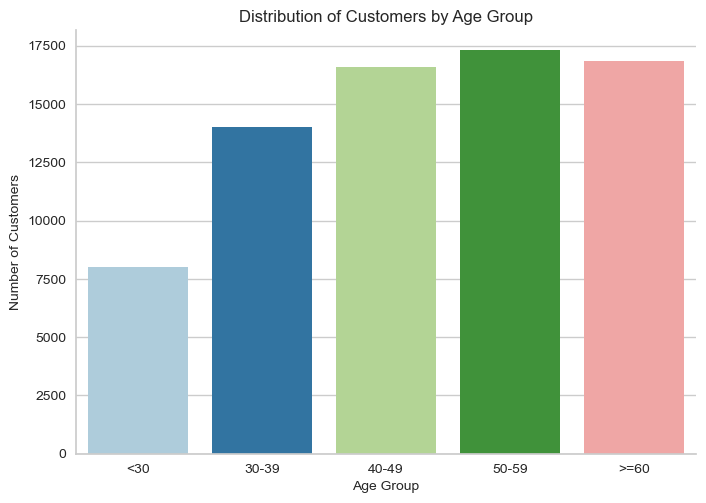

In [62]:
# defining the order for the age bins
order_new = ['<30', '30-39', '40-49', '50-59', '>=60']

# grouping customers by age group
count_age = df_agg.groupby('Age_bins').size().reindex(order_new)

# bar chart
sns.barplot(x=count_age.index, y=count_age.values, palette='Paired')

# decoration
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age Group')

sns.despine()
plt.show()

#### - Revenue by Age Group

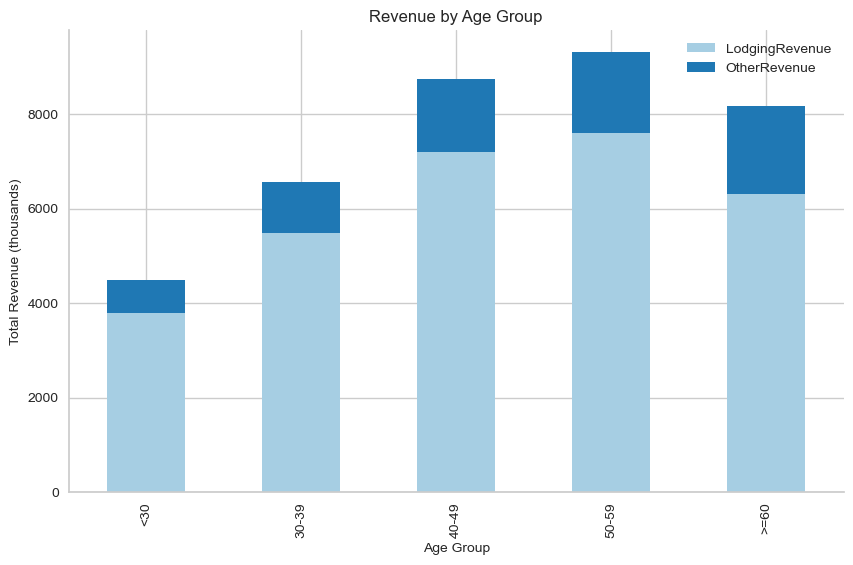

In [63]:
# grouping customers total revenues by age group,
revenue_age = df_agg.groupby('Age_bins')[['LodgingRevenue', 'OtherRevenue']].sum().reindex(order_new)

# divide Y-axis by 1 thousand
revenue_age = revenue_age / 1000

# barplot
colors = sns.color_palette('Paired')
revenue_age_plot = revenue_age.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# decoration
revenue_age_plot.set_xlabel('Age Group')
revenue_age_plot.set_ylabel('Total Revenue (thousands)')
revenue_age_plot.set_title('Revenue by Age Group')

sns.despine()
plt.show()

#### - Bookings with CheckedIn by Top Nationalities

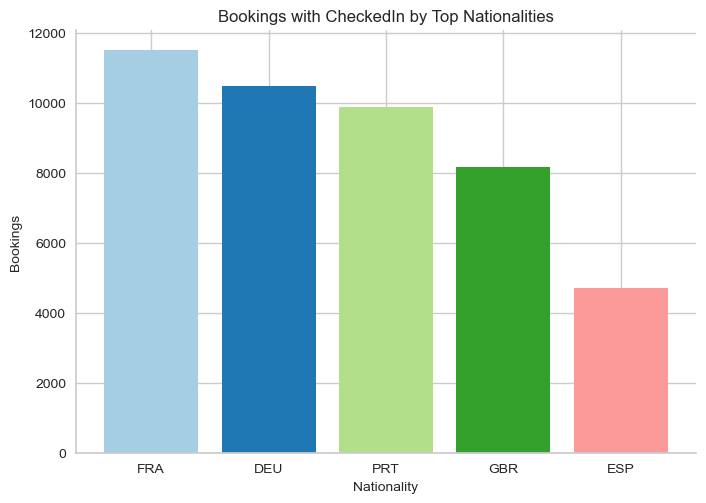

In [64]:
# define top countries (already defined previously)
new_order = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

# group the data by nationality and sum the 'BookingsCheckedIn'
grouped_data = df_agg.groupby('Nationality')[['BookingsCheckedIn']].sum().sort_values(by=['BookingsCheckedIn'])

# top 5 countries
grouped_data = grouped_data.reindex(new_order)

# bar chart
plt.bar(grouped_data['BookingsCheckedIn'].index, grouped_data['BookingsCheckedIn'].values, color=sns.color_palette('Paired', n_colors=len(new_order)))

# decoration
plt.xlabel('Nationality')
plt.ylabel('Bookings')
plt.title('Bookings with CheckedIn by Top Nationalities')

sns.despine()
plt.show()

#### - Bookings canceled and no-shows by top 5 Nationalities

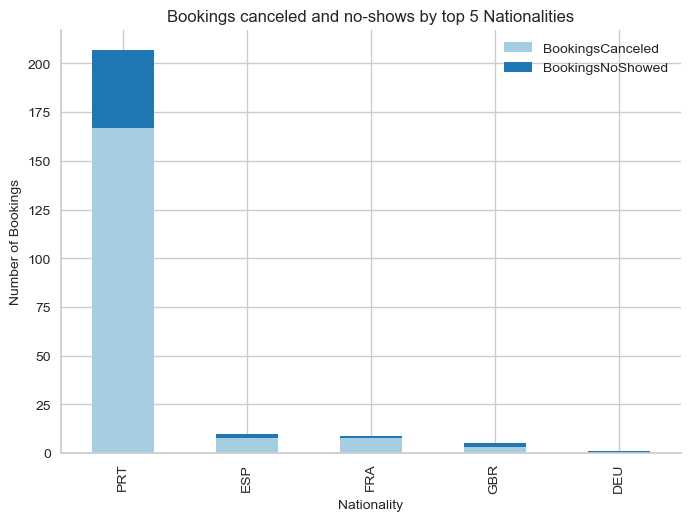

In [65]:
# define top countries (already defined previously)
new_order = ['PRT', 'ESP', 'FRA', 'GBR', 'DEU']

# group the data by nationality and sum the 'BookingsCheckedIn'
grouped_data = df_agg.groupby('Nationality')[['BookingsCanceled', 'BookingsNoShowed']].sum()

# top 5 countries
grouped_data = grouped_data.reindex(new_order)

# Create a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, color=sns.color_palette('Paired'))

plt.xlabel('Nationality')
plt.ylabel('Number of Bookings')
plt.title('Bookings canceled and no-shows by top 5 Nationalities')

sns.despine()
plt.show()

#### - Revenue by Top 5 Nationalities

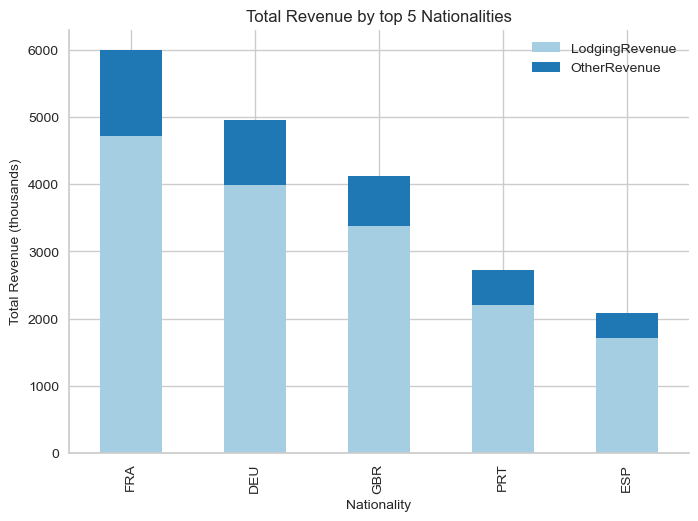

In [66]:
# define top countries (already defined previously)
new_order = ['FRA', 'DEU', 'GBR', 'PRT', 'ESP']

# group the data by nationality and sum the 'BookingsCheckedIn'
grouped_data = df_agg.groupby('Nationality')[['LodgingRevenue', 'OtherRevenue']].sum() / 1000

# top 5 countries
grouped_data = grouped_data.reindex(new_order)

# Create a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, color=sns.color_palette('Paired'))

plt.xlabel('Nationality')
plt.ylabel('Total Revenue (thousands)')
plt.title('Total Revenue by top 5 Nationalities')

sns.despine()
plt.show()

#### - Years of Registration

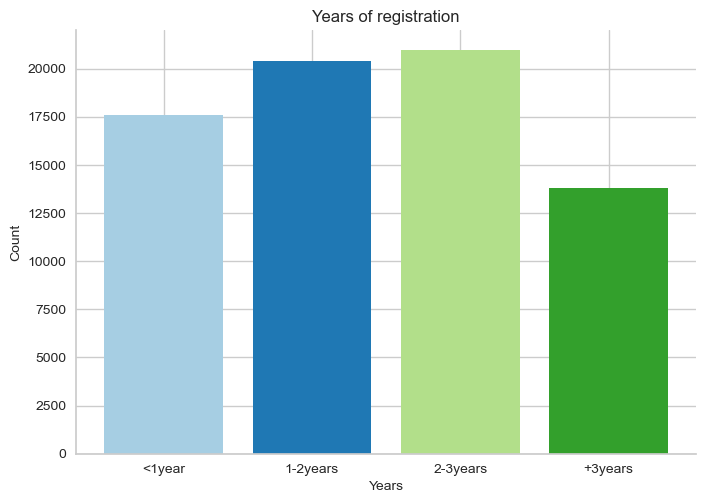

In [67]:
# count values per customer tenure bin // from: ChatGPT 3.5 generation
binned_counts = df_agg['CustomerTenure'].value_counts().sort_index().reset_index()
binned_counts.columns = ['CustomerTenure', 'Count']

# bar chart
plt.bar(binned_counts['CustomerTenure'], binned_counts['Count'], color=sns.color_palette('Paired'))

# decoration
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Years of registration')

sns.despine()
plt.show()

#### - Customers per Distribution Channel

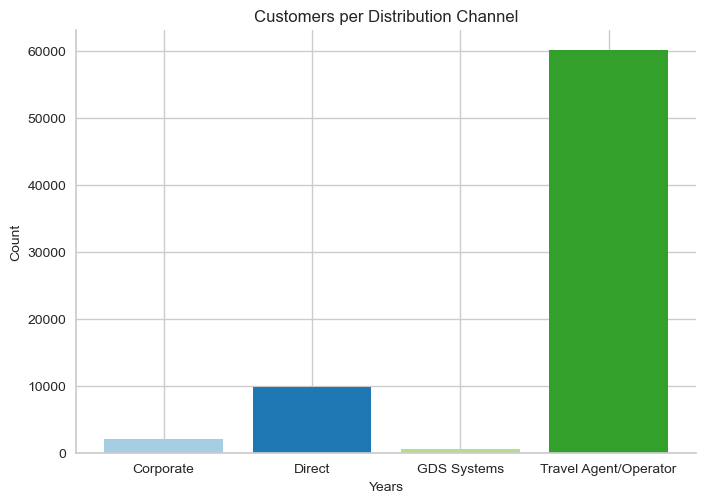

In [68]:
# count values per customer tenure bin // from: ChatGPT 3.5 generation
binned_counts = df_agg['DistributionChannel'].value_counts().sort_index().reset_index()
binned_counts.columns = ['DistributionChannel', 'Count']

# bar chart
plt.bar(binned_counts['DistributionChannel'], binned_counts['Count'], color=sns.color_palette('Paired'))

# decoration
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Customers per Distribution Channel')

sns.despine()
plt.show()

<hr>

<a class="anchor" id="6">

# 6. Modelling

</a>

- for the modelling part most code was from
    - *teachers notes*
    - *ChatGPT 3.5 generation*
    - *https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html*

<hr>

<a class="anchor" id="6_1">

## 6.1. Reducing Dimensionality with PCA

</a>

In [69]:
# fit the PCA algorithm to data
pca = PCA(random_state=100).fit(df_norm)

# show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(df_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.122322,0.122322
1,2,0.083105,0.205427
2,3,0.078087,0.283514
3,4,0.076173,0.359687
4,5,0.072851,0.432538
5,6,0.068484,0.501021
6,7,0.065278,0.566299
7,8,0.061529,0.627828
8,9,0.057645,0.685473
9,10,0.041203,0.726676


- We decided to go with 18 Principal Components, and still mantaining 94% of cumulative variance

In [70]:
# apply the dimension reduction to the dataset (for 18 components)
pca_reduced = PCA(n_components = 18, random_state=5)

pca_reduced.fit(df_norm) # fitting

df_pca = pca_reduced.transform(df_norm) # save in a new dataset

print(df_pca.shape) # 18 cols or pcs

(72751, 18)


<hr>

<a class="anchor" id="6_2">

## 6.2. Modelling with Kmeans

</a>

In [71]:
# create function to find k
def optimal_k(X, max_k):
    
    # initialize lists
    distortions = []
    silhouette_scores = []
    
    # iterate over the amount said
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=5)
        kmeans.fit(X)
        
        # add distortion value to the list
        distortions.append(kmeans.inertia_)
        
        if k > 2:
            # add silhouette score value to the list
            silhouette_scores.append(silhouette_score(X, kmeans.labels_)) 
            
    # plotting elbow method (distortion)
    plt.plot(range(2, max_k+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()
    
    # plotting silhouette scores
    if silhouette_scores:
        plt.plot(range(3, max_k+1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score')
        plt.show()

In [72]:
def kmeans_plus_plus(X, k, seed=None):
    np.random.seed(seed)  # set seed for reproducibility
    centroids = [X[np.random.randint(X.shape[0])]]
    while len(centroids) < k:
        distances = np.array([np.min(np.sum((x - centroids)**2, axis=1)) for x in X])
        probabilities = distances / np.sum(distances)
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                i = j
                break
        centroids.append(X[i])
    return np.array(centroids)

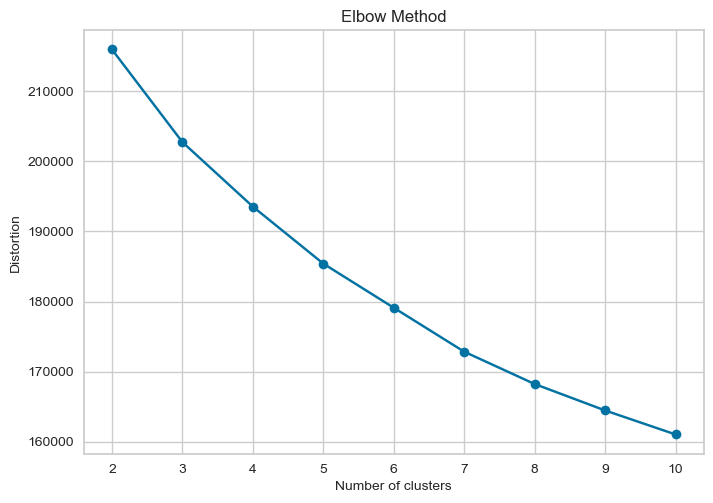

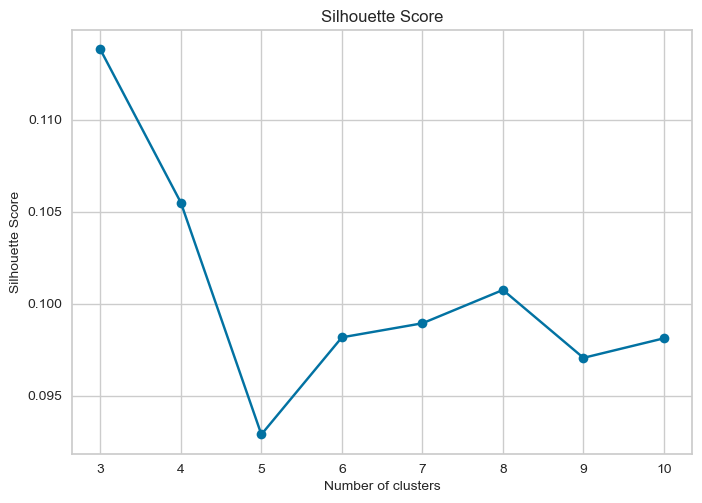

In [73]:
# finding optimal K
optimal_k(df_pca, 10)

In [74]:
# Using optimal K
k_optimal = 5
centroids_optimal = kmeans_plus_plus(df_pca, k_optimal,5)
kmeans_optimal = KMeans(n_clusters=k_optimal, init=centroids_optimal, n_init=5, random_state=5)

all_distances = kmeans_optimal.fit_transform(df_pca)

kmeans_optimal.fit(df_pca)



# save labels
cluster_labels = kmeans_optimal.labels_


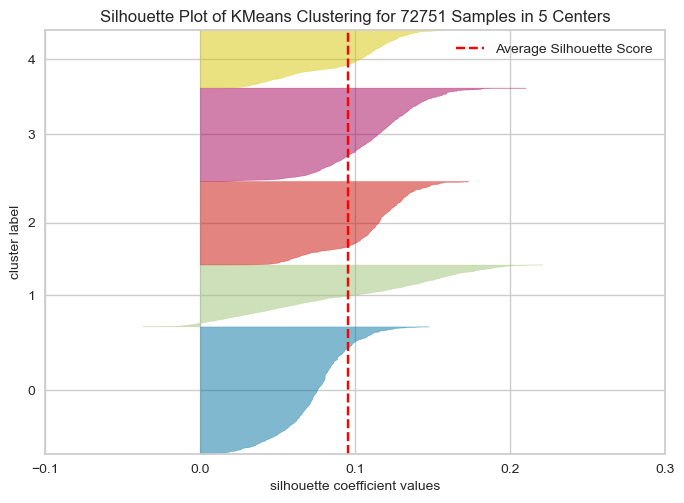

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 72751 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans_optimal, colors='yellowbrick')
visualizer.fit(df_pca)
visualizer.show()

Text(0, 0.5, 'Frequency in cluster')

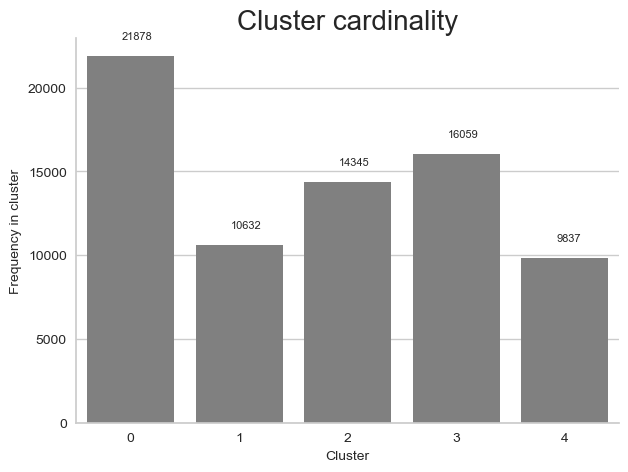

In [76]:
# plot clusters cardinality 

# count observations per cluster
freqByCluster = df_final.groupby(cluster_labels).size()

# draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=cluster_labels, color='grey')

# decoration
fmt = "{x:,.0f}"
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.08 , y=data+1000 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize-10)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")

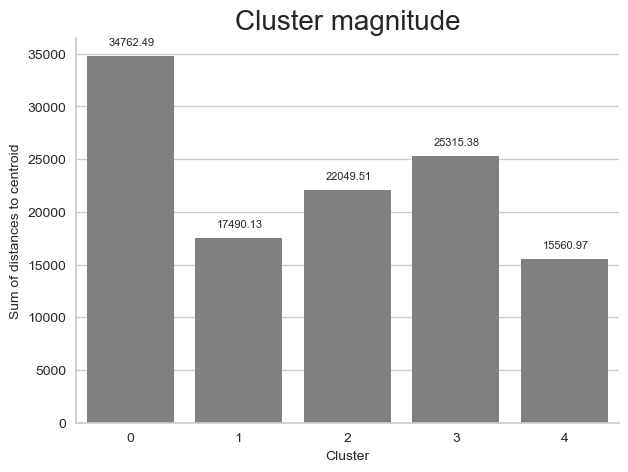

In [77]:
# plot clusters magnitude

# Compute Magnitude
df_final['distanceToCentroid'] = np.min(all_distances,axis=1)
magnitude = df_final['distanceToCentroid'].groupby(cluster_labels).sum()
X = df_final.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
for index,data in enumerate(round(magnitude,2)):
    plt.text(x=index-0.2 , y=data+1000 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize-10)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

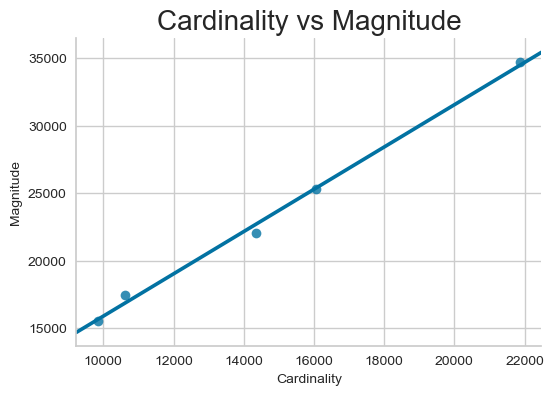

In [78]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"

sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize-10)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

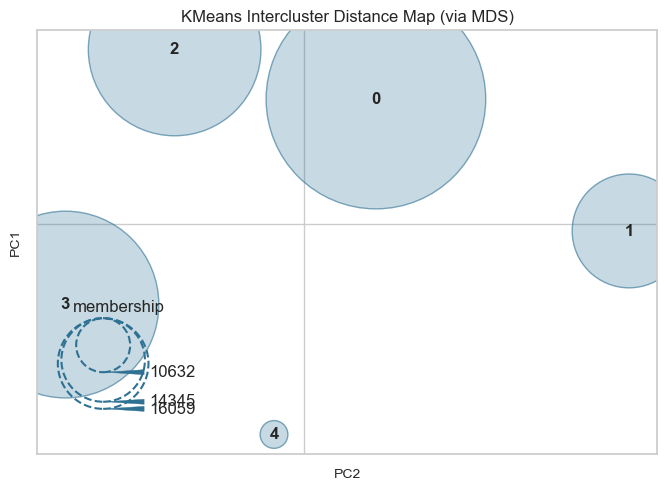

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [79]:
# visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans_optimal)
visualizer.fit(df_pca)
visualizer.show()

In [80]:
# analyze weight of each variable by each component
wheightsDF = pd.DataFrame(pca.components_,columns=df_norm.columns)
wheightsDF

,Special Requests,King Size Bed Requests,Twin Bed Requests,Invalid Bookings,Direct Distribution Channel,Travel Agent/Operator Dist.,Other Distribution Channel,German,Spanish,French,British,Portuguese,One-Time Customers,Age 40-49,Age 50-59,Age <30,Age >=60,Customer Tenure 1-2 years,Customer Tenure 2-3 years,Customer Tenure <1 year,Average Lead Time 2-6 months,Average Lead Time <2 months,Total Revenue >Q3,Total Revenue Q1-Q2,Total Revenue Q2-Q3,Room*Nights >10
0,-2.284073e-02,-2.248993e-02,-5.795152e-02,2.182894e-03,0.129696,-0.182960,0.053264,-7.606624e-02,3.216758e-02,2.125984e-03,-3.884861e-02,1.044618e-01,-3.313557e-02,9.469984e-02,-1.819660e-02,8.779848e-03,-1.314970e-01,-3.885710e-02,-4.468405e-02,7.737414e-02,-6.224982e-01,7.000868e-01,-5.776364e-02,-1.465778e-02,-6.915442e-02,3.451701e-03
1,-6.595580e-03,-2.018878e-02,-4.522156e-02,1.794283e-03,0.256268,-0.294222,0.037955,-8.564690e-02,7.169426e-03,-9.827031e-03,-7.728221e-03,3.034663e-02,-4.808061e-02,1.446075e-01,5.707983e-02,2.114245e-02,-2.213855e-01,4.709156e-01,-5.324084e-01,9.179270e-02,1.596341e-01,-6.301823e-02,3.471686e-01,-3.092794e-01,-4.627833e-03,1.072592e-02
2,-1.462953e-01,-7.232278e-01,2.335259e-01,4.300501e-04,0.293037,-0.345790,0.052753,8.031760e-02,-5.531004e-04,-6.267534e-02,-1.594135e-02,4.907314e-02,-2.266381e-03,1.461443e-02,-8.818327e-02,-6.273494e-03,1.077600e-01,-1.971696e-01,8.976705e-02,9.900184e-02,7.183759e-02,-1.114878e-01,2.630319e-02,1.603160e-01,-2.436657e-01,-3.588710e-04
3,1.063597e-01,1.633077e-01,-1.310165e-01,1.816245e-03,0.154775,-0.166715,0.011941,-1.137637e-01,1.831513e-02,6.931396e-02,-1.072996e-02,1.179911e-02,-3.475774e-02,1.563946e-01,1.616258e-01,-3.414014e-03,-3.044497e-01,-4.421027e-01,4.874487e-01,1.449097e-03,1.215279e-01,-3.269800e-02,4.071541e-01,-3.321672e-01,-7.037512e-02,1.290493e-02
4,8.990386e-03,2.387093e-01,1.360352e-02,-4.364884e-04,-0.080151,0.105955,-0.025804,7.310068e-02,-3.125591e-02,-1.044321e-02,-1.044616e-02,-4.724025e-02,-4.623127e-03,-7.029996e-02,-1.545462e-01,5.532218e-02,1.650176e-01,-3.773375e-01,-3.362066e-01,6.870896e-01,-1.644583e-02,-3.403350e-02,2.256525e-01,7.586009e-02,-2.662571e-01,4.413653e-03
5,-5.646032e-02,-1.385365e-01,5.069227e-02,-1.048058e-03,0.071446,-0.077755,0.006309,4.228688e-02,-8.498556e-03,-2.542358e-02,5.107162e-04,-2.138422e-03,1.441319e-02,-5.100987e-02,-3.088157e-02,2.095227e-02,5.348435e-02,-2.375787e-01,-6.682727e-02,2.993926e-01,1.291036e-02,-1.580375e-02,-2.997712e-01,-4.387460e-01,7.217255e-01,-8.599527e-03
6,-3.645010e-03,-1.199229e-01,5.958276e-02,-2.873332e-04,-0.034380,0.039765,-0.005385,9.383788e-02,-9.423611e-03,-7.806863e-03,-3.842663e-03,-4.270594e-02,2.187624e-03,-6.102599e-01,7.465414e-01,1.577700e-03,-1.267790e-01,-1.199109e-02,-7.276917e-02,7.470674e-02,-6.462444e-02,4.371678e-02,6.376551e-02,4.217358e-03,-3.815158e-02,6.542936e-04
7,5.052117e-02,-1.061386e-01,1.498644e-01,1.054187e-03,-0.096422,0.116916,-0.020495,8.935987e-02,-1.703110e-02,-3.932098e-02,8.744455e-03,-5.754236e-02,-3.477213e-02,-2.777361e-01,-2.217628e-01,5.706531e-03,5.124799e-01,1.154280e-01,1.101201e-01,-2.069135e-01,-2.070113e-01,8.345704e-02,4.526728e-01,-4.613399e-01,-3.092458e-02,1.214025e-02
8,1.726351e-02,4.050225e-01,-2.798297e-01,2.546352e-03,0.431501,-0.471750,0.040249,-3.091626e-02,-1.923354e-02,-5.574753e-02,2.932909e-02,6.421366e-02,-4.454360e-02,-3.415699e-01,-3.840083e-02,-4.220790e-02,3.986296e-01,4.946666e-03,6.364683e-02,-7.196167e-02,4.405857e-02,-6.374549e-02,-1.442528e-01,1.431021e-01,1.376115e-02,4.334804e-03
9,-9.177316e-02,-1.037657e-01,-1.991703e-02,-1.420891e-03,0.010636,0.016864,-0.027500,-4.552502e-01,-4.875825e-02,7.758492e-01,-7.109954e-02,-9.654119e-02,3.278165e-02,-2.256899e-01,-1.376602e-01,2.496244e-01,1.186301e-02,-9.172327e-03,-3.039577e-02,-1.949513e-03,1.068205e-01,7.870567e-02,-8.554952e-03,3.313665e-02,9.196102e-03,-4.865252e-03


In [81]:
# study the weights of first component 
comp = abs(wheightsDF.iloc[0]) 
comp = comp.sort_values(ascending=False)
comp

Average Lead Time <2 months     0.700087
Average Lead Time 2-6 months    0.622498
Travel Agent/Operator Dist.     0.182960
Age >=60                        0.131497
Direct Distribution Channel     0.129696
Portuguese                      0.104462
Age 40-49                       0.094700
Customer Tenure <1 year         0.077374
German                          0.076066
Total Revenue Q2-Q3             0.069154
Twin Bed Requests               0.057952
Total Revenue >Q3               0.057764
Other Distribution Channel      0.053264
Customer Tenure 2-3 years       0.044684
Customer Tenure 1-2 years       0.038857
British                         0.038849
One-Time Customers              0.033136
Spanish                         0.032168
Special Requests                0.022841
King Size Bed Requests          0.022490
Age 50-59                       0.018197
Total Revenue Q1-Q2             0.014658
Age <30                         0.008780
Room*Nights >10                 0.003452
Invalid Bookings

In [82]:
# check the mean values of each cluster for top 20 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(df_final[top_features].groupby(cluster_labels).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4
Average Lead Time <2 months,0.760079,0.779439,0.822656,0.000000,0.000000
Average Lead Time 2-6 months,0.000000,0.134312,0.000000,1.000000,0.771780
Travel Agent/Operator Dist.,0.998263,0.000000,0.990310,0.970297,0.863780
Age >=60,0.267026,0.148608,0.218194,0.258484,0.217139
Direct Distribution Channel,0.000000,0.794959,0.000000,0.013949,0.125546
Portuguese,0.103529,0.234951,0.086720,0.069369,0.031107
Age 40-49,0.215970,0.293454,0.223144,0.201694,0.234523
Customer Tenure <1 year,0.240378,0.288281,0.255420,0.183324,0.272339
German,0.197824,0.070260,0.100105,0.144094,0.141202
Total Revenue Q2-Q3,0.235579,0.216986,0.284559,0.411358,0.000000


<hr>

<a class="anchor" id="7">

# 7. Cluster Interpretation

</a>

In [83]:
df_final = pd.concat([df_final, pd.DataFrame(cluster_labels, index = df_final.index)], axis=1).rename(columns={0:"Cluster"})

In [84]:
# To better interpret
df_final['Age 30-39'] = ((df_final['Age <30'] == 0) & (df_final['Age 40-49'] == 0) & (df_final['Age 50-59'] == 0) & (df_final['Age >=60'] == 0)).astype(int)

df_final['Total Revenue <Q1'] = ((df_final['Total Revenue Q1-Q2'] == 0) & (df_final['Total Revenue Q2-Q3'] == 0) & (df_final['Total Revenue >Q3'] == 0)).astype(int)

df_final['Average Lead Time 6+ months'] = ((df_final['Average Lead Time 2-6 months'] == 0) & (df_final['Average Lead Time <2 months'] == 0)).astype(int) 

df_final['Customer Tenure >3 years'] = ((df_final['Customer Tenure 1-2 years'] == 0) & (df_final['Customer Tenure 2-3 years'] == 0) & (df_final['Customer Tenure <1 year'] == 0)).astype(int)


In [85]:
df_final.groupby('Cluster').mean().T

Cluster,0,1,2,3,4
Special Requests,0.095164,0.087472,0.211223,0.129460,0.205652
King Size Bed Requests,0.000000,0.184161,1.000000,0.371754,0.404392
Twin Bed Requests,0.262821,0.074492,0.007808,0.155800,0.173224
RoomNights,2.882576,3.108540,3.041548,2.941217,4.994511
Invalid Bookings,0.000366,0.006584,0.001115,0.000125,0.000407
Direct Distribution Channel,0.000000,0.794959,0.000000,0.013949,0.125546
Travel Agent/Operator Dist.,0.998263,0.000000,0.990310,0.970297,0.863780
Other Distribution Channel,0.001737,0.205041,0.009690,0.015754,0.010674
German,0.197824,0.070260,0.100105,0.144094,0.141202
Spanish,0.066002,0.080418,0.064343,0.043278,0.046051


### Main Insights<br>
#### Cluster 0

**"Mature Traveler Comfort"**

- Cluster with the <mark> most amount of customers (30%) </mark>
- Clients with various nationalities, with highlight in German (20%)
- Very diverse in age, with <mark> 70% of customers being above the 40 years old </mark>
- <mark>62% of customers are below the median of total revenues</mark>.
- In terms of average lead time, <mark>76% of the customers books their stay less than 2 months before</mark>
- Not many invalid bookings
- 49% of the customers made their booking in recent 2 years, and 51% more than 2 years ago
- Very few repeated customers (<2%)
- <mark>No special requests regarding King Size Bed</mark>, but 26% of customers ask for a twin size bed (higher than any other cluster)
- <mark>All clients come from Travel Agents or Operators</mark>
- These clients have the lowest rooms per night of all clusters


#### Cluster 1

**"Diverse Direct Bookers"**

- Cluster with 15% of the customers
- <mark> 80% of the clients come from Direct booking with the hotel </mark>, the other 20% come from other means
- Also diverse in nationalities, with an highlight in Portuguese (20%) and Spanish (8%), being higher than any other cluster
- The higher % of clients with invalid bookings (0.6%)
- Very diverse in age, with <mark> 50% of customers being between the 30 and 50 years old</mark>
- Around 34% of customer are below the first Quartile of the Total Revenues (higher than any other cluster), but otherwise very diverse
- <mark> 77% of the clients made their reservation 2 months before </mark>, and 91% of them booked 6 months before
- This segment present the most loyal customer with 12% of them being repeated clients
- No special information regarding special requests
- Most recent bookers, since almost 30% of them booked with the hotel last year

#### Cluster 2

**"Crown Comfort Seekers"**

- Cluster with 20% of customers
- Segment with a high diversity in Nationalities with a higher presence of French (16%) and British (12%)
- <mark> All customers request a king size bed </mark>
- Around 21% of the clients have a special request
- <mark> All clients come from Travel Agents or Operators </mark>
- Very diverse customers in age, no special characteristic around 20% of customers belong to a unique age group
- <mark>82% of the customers book their reservation with 2 months prior </mark>
- 53% of the customer are below the median of Total Revenues

#### Cluster 3

**"Advance Planners"**


- Cluster with 22% of customers
- <mark>All customers book their reservation between 2 and 6 months before the day</mark>
- 60% of customers are above the 40 years old
- Very diverse group in termes of nationatilities
- 37% of them asks for a king size bed, and 16% asks for a twin size bed
- 97% of the clients come from travel agent or operator booking
- Not very recent customers, most customers made their booking more than 1 year ago
- <mark> No clients above the third quartile of Total Revenue </mark>, but "40% in Q2-Q3


#### Cluster 4

**"Top Spenders Collective"**

- <mark>Smallest cluster of all with only 13% of all customers</mark>
- The most diverse in terms of nationality with 48% of them being from diverent nationalities, and the top 5 nationalities are not very evident
- <mark>Clients above the third quartile of revenues, or the clients that spend the most</mark>
- Around 20% of them asks a special request, 40% for a king size bed, and 17% of them for a twin size bed
- <mark>Its cluster with the highest Room per Night of all</mark>, with around 5 rooms per night total per client
- Also diverse in age, with 13% of them being lower than 30 year old
- Almost 77% of them books the reservation between 2 and 6 months prior the day
- Only 5% of them are repeat customers
- 86% of them come from Travel Agencies or Operators, and teh rest from direct booking